In [6]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from read_data import *
from nearNeighbors import *
from scipy import stats
from astropy import stats
import healpy as hp
from localBKG_and_interlopersHEALPix import *
# import healpy as hpy
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *
from read_bricks import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random

In [7]:
# read LRG data arrays

data_raLRG = np.load('/Users/mtownsend/anaconda/Data/ra_LRG.npz')
raLRG = data_raLRG['ra_LRG']
print(raLRG.shape)

print('----')

data_decLRG = np.load('/Users/mtownsend/anaconda/Data/dec_LRG.npz')
decLRG = data_decLRG['dec_LRG']
print(decLRG.shape)

print('----')

data_zLRG = np.load('/Users/mtownsend/anaconda/Data/z_LRG.npz')
zLRG = data_zLRG['z_LRG']
print(zLRG.shape)

print('----')

data_gmagLRG = np.load('/Users/mtownsend/anaconda/Data/gmag_LRG.npz')
gmagLRG = data_gmagLRG['gmag_LRG']
print(gmagLRG.shape)

print('----')

data_rmagLRG = np.load('/Users/mtownsend/anaconda/Data/rmag_LRG.npz')
rmagLRG = data_rmagLRG['rmag_LRG']
print(rmagLRG.shape)

print('----')

data_zmagLRG = np.load('/Users/mtownsend/anaconda/Data/zmag_LRG.npz')
zmagLRG = data_zmagLRG['zmag_LRG']
print(zmagLRG.shape)
print(zmagLRG.min())
print(zmagLRG.max())

print('----')

data_grcolorLRG = np.load('/Users/mtownsend/anaconda/Data/grcolor_LRG.npz')
grcolorLRG = data_grcolorLRG['grcolor_LRG']
print(grcolorLRG.shape)

print('----')

data_rzcolorLRG = np.load('/Users/mtownsend/anaconda/Data/rzcolor_LRG.npz')
rzcolorLRG = data_rzcolorLRG['rzcolor_LRG']
print(rzcolorLRG.shape)



print(raLRG[150])
print(decLRG[150])

print('----')

print(raLRG[1500])
print(decLRG[1500])

(1823,)
----
(1823,)
----
(1823,)
----
(1823,)
----
(1823,)
----
(1823,)
15.818878
21.957382
----
(1823,)
----
(1823,)
242.28913670414747
6.524338879721299
----
241.4120050565054
9.842251214678257


In [8]:
# read BKG data arrays

data_raBKG = np.load('/Users/mtownsend/anaconda/Data/ra_BKG_v2.npz')
raBKG = data_raBKG['ra_BKG']
print(raBKG.shape)

print('----')

data_decBKG = np.load('/Users/mtownsend/anaconda/Data/dec_BKG_v2.npz')
decBKG = data_decBKG['dec_BKG']
print(decBKG.shape)

print('----')

data_gmagBKG = np.load('/Users/mtownsend/anaconda/Data/gmag_BKG_v2.npz')
gmagBKG = data_gmagBKG['gmag_BKG']
print(gmagBKG.shape)

print('----')

data_rmagBKG = np.load('/Users/mtownsend/anaconda/Data/rmag_BKG_v2.npz')
rmagBKG = data_rmagBKG['rmag_BKG']
print(rmagBKG.shape)

print('----')

data_zmagBKG = np.load('/Users/mtownsend/anaconda/Data/zmag_BKG_v2.npz')
zmagBKG = data_zmagBKG['zmag_BKG']
print(zmagBKG.shape)

print('----')


data_grcolorBKG = np.load('/Users/mtownsend/anaconda/Data/grcolor_BKG_v2.npz')
grcolorBKG = data_grcolorBKG['grcolor_BKG']
print(grcolorBKG.shape)

print('----')

data_rzcolorBKG = np.load('/Users/mtownsend/anaconda/Data/rzcolor_BKG_v2.npz')
rzcolorBKG = data_rzcolorBKG['rzcolor_BKG']
print(rzcolorBKG.shape)

(1294476,)
----
(1294476,)
----
(1294476,)
----
(1294476,)
----
(1294476,)
----
(1294476,)
----
(1294476,)


In [28]:
# # save combined LRG and BKG lists

# create combined LRG-BKG lists

ra_total = np.concatenate([raLRG, raBKG])
dec_total = np.concatenate([decLRG, decBKG])
gmag_total = np.concatenate([gmagLRG, gmagBKG])
rmag_total = np.concatenate([rmagLRG, rmagBKG])
zmag_total = np.concatenate([zmagLRG, zmagBKG])
rzcolor_total = np.concatenate([rzcolorLRG, rzcolorBKG])
grcolor_total = np.concatenate([grcolorLRG, grcolorBKG])

print(len(ra_total))



# # np.savez('/Users/mtownsend/Documents/LRG_Data/ra_total.npz', ra=ra)
# # print(ra.shape)
# data_ra = np.load('/Users/mtownsend/Documents/LRG_Data/ra_total.npz')
# ra_total = data_ra['ra']
# print(ra_total.shape)

# print('----')

# # np.savez('/Users/mtownsend/Documents/LRG_Data/dec_total.npz', dec=dec)
# # print(dec.shape)
# data_dec = np.load('/Users/mtownsend/Documents/LRG_Data/dec_total.npz')
# dec_total = data_dec['dec']
# print(dec_total.shape)

# print('----')

# # np.savez('/Users/mtownsend/Documents/LRG_Data/gmag_total.npz', gmag=gmag)
# # print(gmag.shape)
# data_gmag = np.load('/Users/mtownsend/Documents/LRG_Data/gmag_total.npz')
# gmag_total = data_gmag['gmag']
# print(gmag_total.shape)

# print('----')

# # np.savez('/Users/mtownsend/Documents/LRG_Data/rmag_total.npz', rmag=rmag)
# # print(rmag.shape)
# data_rmag = np.load('/Users/mtownsend/Documents/LRG_Data/rmag_total.npz')
# rmag_total = data_rmag['rmag']
# print(rmag_total.shape)

# print('----')

# # np.savez('/Users/mtownsend/Documents/LRG_Data/zmag_total.npz', zmag=zmag)
# # print(zmag.shape)
# data_zmag = np.load('/Users/mtownsend/Documents/LRG_Data/zmag_total.npz')
# zmag_total = data_zmag['zmag']
# print(zmag_total.shape)

# print('----')

# # np.savez('/Users/mtownsend/Documents/LRG_Data/grcolor_total.npz', grcolor=grcolor)
# # print(grcolor.shape)
# data_grcolor = np.load('/Users/mtownsend/Documents/LRG_Data/grcolor_total.npz')
# grcolor_total = data_grcolor['grcolor']
# print(grcolor_total.shape)

# print('----')

# # np.savez('/Users/mtownsend/Documents/LRG_Data/rzcolor_total.npz', rzcolor=rzcolor)
# # print(rzcolor.shape)
# data_rzcolor = np.load('/Users/mtownsend/Documents/LRG_Data/rzcolor_total.npz')
# rzcolor_total = data_rzcolor['rzcolor']
# print(rzcolor_total.shape)

# print(rzcolor_total[0:10])
# print(rzcolor_total[0])
# print(rzcolor_total[5])

1296299


In [31]:
data_index_lowz = np.load('/Users/mtownsend/Documents/LRG_Data/index_lowz-EDR.npz')
index_lowz = data_index_lowz['index_lowz']
print(index_lowz)
print(index_lowz.max())

data_index_midz = np.load('/Users/mtownsend/Documents/LRG_Data/index_midz-EDR.npz')
index_midz = data_index_midz['index_midz']
print(index_midz)
print(index_midz.max())

data_index_high = np.load('/Users/mtownsend/Documents/LRG_Data/index_highz-EDR.npz')
index_high = data_index_high['index_highz']
print(index_high)
print(index_high.max())

[ 349113 1295532  526059 ...  891250  787404  561009]
1296161
[566627 566836 113722 ... 187377  73613 102794]
1296196
[1259334  192252  753626 ...  754458  323083  602180]
1295965


In [32]:
# make a random data set that I will treat as LRGs
random_raLRG = ra_total[index_lowz]
random_decLRG = dec_total[index_lowz]
random_gmagLRG = gmag_total[index_lowz]
random_rmagLRG = rmag_total[index_lowz]
random_zmagLRG = zmag_total[index_lowz]
random_grcolorLRG = grcolor_total[index_lowz]
random_rzcolorLRG = rzcolor_total[index_lowz]

# eliminate "LRGs" from background catalog
random_raBKG = np.delete(ra_total, index_lowz)
random_decBKG = np.delete(dec_total, index_lowz)
random_gmagBKG = np.delete(gmag_total, index_lowz)
random_rmagBKG = np.delete(rmag_total, index_lowz)
random_zmagBKG = np.delete(zmag_total, index_lowz)
random_grcolorBKG = np.delete(grcolor_total, index_lowz)
random_rzcolorBKG = np.delete(rzcolor_total, index_lowz)

print(len(random_raLRG))
print(len(random_raBKG))
print(len(ra_total))
print(len(random_raLRG) + len(random_raBKG))

ra_tot = np.concatenate([random_raLRG, random_raBKG])
dec_tot = np.concatenate([random_decLRG, random_decBKG])
gmag_tot = np.concatenate([random_gmagLRG, random_gmagBKG])
rmag_tot = np.concatenate([random_rmagLRG, random_rmagBKG])
zmag_tot = np.concatenate([random_zmagLRG, random_zmagBKG])
rzcolor_tot = np.concatenate([random_rzcolorLRG, random_rzcolorBKG])
grcolor_tot = np.concatenate([random_grcolorLRG, random_grcolorBKG])

print(len(ra_tot))
print(len(dec_tot))


5000
1291299
1296299
1296299
1296299
1296299


In [33]:
# read in data

rz_edges = np.array([-1.8027077, -1.5527076721191406, -1.3027076721191406, -1.0527076721191406, -0.8027076721191406, -0.5527076721191406, -0.3027076721191406, -0.052707672119140625, 0.19729232788085938, 0.4472923278808594, 0.6972923278808594, 0.9472923278808594, 1.1972923278808594, 1.4472923278808594, 1.6972923278808594, 1.9472923278808594, 2.1972923278808594, 2.4472923278808594, 2.6972923278808594, 2.9472923278808594, 3.1972923278808594, 3.4472923278808594, 3.6972923278808594, 3.9472923278808594, 4.197292327880859, 4.447292327880859, 4.697292327880859, 4.947292327880859, 5.197292327880859, 5.447292327880859, 5.697292327880859, 5.947292327880859, 6.197292327880859, 6.447292327880859, 6.697292327880859, 6.947292327880859, 7.197292327880859, 7.447292327880859, 7.697292327880859, 7.947292327880859, 8.19729232788086, 8.44729232788086, 8.69729232788086, 8.94729232788086, 9.19729232788086, 9.44729232788086, 9.69729232788086, 9.94729232788086, 10.19729232788086, 10.44729232788086])
gr_edges = np.array([-6.5846786, -6.234678649902344, -5.8846786499023445, -5.534678649902345, -5.184678649902345, -4.8346786499023455, -4.484678649902346, -4.134678649902346, -3.784678649902346, -3.434678649902346, -3.084678649902346, -2.734678649902346, -2.384678649902346, -2.0346786499023457, -1.6846786499023456, -1.3346786499023455, -0.9846786499023455, -0.6346786499023456, -0.2846786499023456, 0.06532135009765438, 0.41532135009765436, 0.7653213500976543, 1.1153213500976542, 1.4653213500976543, 1.8153213500976544, 2.1653213500976545, 2.5153213500976546, 2.8653213500976547, 3.2153213500976547, 3.565321350097655, 3.915321350097655, 4.265321350097655, 4.615321350097655, 4.965321350097654, 5.315321350097654, 5.665321350097654, 6.015321350097653, 6.365321350097653, 6.7153213500976525, 7.065321350097652, 7.415321350097652, 7.7653213500976515, 8.115321350097652, 8.465321350097652, 8.815321350097651, 9.165321350097651, 9.51532135009765, 9.86532135009765, 10.21532135009765, 10.56532135009765])

zmaginit = 13.
zmagfin = 23.
interval = 0.2
zmag_num = (zmagfin-zmaginit)/interval
zmag_edges, step = np.linspace(zmaginit, zmagfin, num=int(zmag_num), retstep=True)
print(type(zmag_edges))
print(zmag_edges)


H1, nouse_edges = np.histogramdd((rzcolor_tot, grcolor_tot, zmag_tot), bins=(rz_edges, gr_edges, zmag_edges), density=False)


<class 'numpy.ndarray'>
[13.         13.20408163 13.40816327 13.6122449  13.81632653 14.02040816
 14.2244898  14.42857143 14.63265306 14.83673469 15.04081633 15.24489796
 15.44897959 15.65306122 15.85714286 16.06122449 16.26530612 16.46938776
 16.67346939 16.87755102 17.08163265 17.28571429 17.48979592 17.69387755
 17.89795918 18.10204082 18.30612245 18.51020408 18.71428571 18.91836735
 19.12244898 19.32653061 19.53061224 19.73469388 19.93877551 20.14285714
 20.34693878 20.55102041 20.75510204 20.95918367 21.16326531 21.36734694
 21.57142857 21.7755102  21.97959184 22.18367347 22.3877551  22.59183673
 22.79591837 23.        ]


In [13]:
null_near_low = np.load('/Users/mtownsend/Documents/LRG_Data/null_near_low-EDR.npz')
near_total_low = null_near_low['near_total']
low_near35 = null_near_low['data_near35']
print(low_near35.shape)

print('----')

null_near_mid = np.load('/Users/mtownsend/Documents/LRG_Data/null_near_mid-EDR.npz')
near_total_mid = null_near_mid['near_total']
mid_near35 = null_near_mid['data_near35']
mid_near05 = null_near_mid['data_near05']
print(mid_near35.shape)
print(mid_near05.shape)

print('----')

null_near_high = np.load('/Users/mtownsend/Documents/LRG_Data/null_near_high-EDR.npz')
near_total_high = null_near_high['near_total']
high_near35 = null_near_high['data_near35']
high_near05 = null_near_high['data_near05']
high_near65 = null_near_high['data_near65']
print(high_near35.shape)
print(high_near05.shape)
print(high_near65.shape)


(5000, 49, 49, 49)
----
(1689, 49, 49, 49)
(3311, 49, 49, 49)
----
(862, 49, 49, 49)
(1721, 49, 49, 49)
(2417, 49, 49, 49)


In [23]:
null_near_index_low = np.load('/Users/mtownsend/Documents/LRG_Data/null_near_index_low-EDR.npz')
# print(null_near_index_low.files)
near_index_total_low = null_near_index_low['index_total']
low_near_index35 = null_near_index_low['data_near_index35']
print(low_near_index35.shape)

print('----')

null_near_index_mid = np.load('/Users/mtownsend/Documents/LRG_Data/null_near_index_mid-EDR.npz')
near_index_total_mid = null_near_index_mid['index_total']
mid_near_index35 = null_near_index_mid['data_near_index35']
mid_near_index05 = null_near_index_mid['data_near_index05']
print(mid_near_index35.shape)
print(mid_near_index05.shape)

print('----')

null_near_index_high = np.load('/Users/mtownsend/Documents/LRG_Data/null_near_index_high-EDR.npz')
near_index_total_high = null_near_index_high['index_total']
high_near_index35 = null_near_index_high['data_near_index35']
high_near_index05 = null_near_index_high['data_near_index05']
high_near_index65 = null_near_index_high['data_near_index65']
print(high_near_index35.shape)
print(high_near_index05.shape)
print(high_near_index65.shape)

(5000,)
----
(1689,)
(3311,)
----
(862,)
(1721,)
(2417,)


In [66]:
data_zmag = np.load('/Users/mtownsend/Desktop/lowz_medzmag-1matrices-EDR.npz')
medzmag = data_zmag['medzmag']
print(medzmag.shape)
medzmag0 = medzmag[0]
print(medzmag0.shape)
# medzmag1 = medzmag[1]
# print(medzmag1.shape)
# medzmag2 = medzmag[2]
# print(medzmag1.shape)

(1, 49, 49)
(49, 49)


In [67]:
# testing algorithm to insert satellites into near arrays

def adding_sats(medzmag, index, rzcolor_total, grcolor_total, zmag_total, rz_edges, gr_edges, lam):
    
    # index == index of sources found to be 500 kpc from LRG pointing
    # medzmag == array of zmags that correspond to luminosity limits for each cell of r-z and g-r color
    # rzcolor_total, grcolor_total, zmag_total == 1D arrays with colors and magnitude of all sources
    # rz_edges, gr_edges == edges of r-z vs g-r color space
    # lam == mean of poisson distribution from which the function draws the number of sources to be added
    
    import numpy as np
    
#     print('loop begins')
    
    rz = rzcolor_total[index]
    gr = grcolor_total[index]
    zmag = zmag_total[index]
    
#     print('length rz = ' , len(rz))

    candidate_index = []
    alt_candidate_index = []
    temp_rz = []
    temp_gr = []
    temp_zmag = []

    # This loop finds the galaxies in color-color cells that meet the critera of median_zmag in those cells
    for i in range(len(rz_edges) - 1):
        for j in range(len(gr_edges) - 1):
            for m in range(len(rz)):
                if ((rz[m] >= rz_edges[i]) & (rz[m] <= rz_edges[i + 1]) & (gr[m] >= gr_edges[j]) & (gr[m] <= gr_edges[j + 1]) & (zmag[m] < medzmag[i][j])):
                    candidate_index.append(m)
                    
    if (len(candidate_index) == 0.):
        for i in range(len(rz_edges) - 1):
            for j in range(len(gr_edges) - 1):
                for m in range(len(rz)):
                    if ((rz[m] >= rz_edges[i]) & (rz[m] <= rz_edges[i + 1]) & (gr[m] >= gr_edges[j]) & (gr[m] <= gr_edges[j + 1]) & (medzmag[i][j] > -999)):
                        alt_candidate_index.append(m)
                        temp_rz.append(rz[m])
                        temp_gr.append(gr[m])
                        temp_zmag.append(medzmag[i][j] - 1.)
                
    N = np.random.poisson(lam=lam, size=1)
#     print(N)
    num = round(float(N))
#     print('num = ', num)
    if (len(candidate_index) > 0.):
#         print(candidate_index)
        a = np.random.choice(candidate_index, size=int(num), replace=True)
#         print('a = ', a)
        new_rz = np.concatenate((rz,rz[a]))
        new_gr = np.concatenate((gr,gr[a]))
        new_zmag = np.concatenate((zmag,zmag[a] - 1.))
    else:
#         print(len(alt_candidate_index))
        rz_temp = np.asarray(temp_rz)
        gr_temp = np.asarray(temp_gr)
        zmag_temp = np.asarray(temp_zmag)
        b = np.random.choice(range(len(alt_candidate_index)), size=int(num), replace=True)
#         print('b = ', b)
        new_rz = np.concatenate((rz,rz_temp[b]))
        new_gr = np.concatenate((gr,gr_temp[b]))
        new_zmag = np.concatenate((zmag,zmag_temp[b]))
        
#     print('length new_rz = ', len(new_rz))
#     print()
    
    return new_rz, new_gr, new_zmag, candidate_index, alt_candidate_index
    
    

In [68]:
# test_index = low_near_index35[5:10]
# print(len(test_index))

new_rz35_1 = []
new_gr35_1 = []
new_zmag35_1 = []
new_index35_1 = []
new_alt_index35_1 = []

new_rz35_2 = []
new_gr35_2 = []
new_zmag35_2 = []
new_index35_2 = []
new_alt_index35_2 = []

new_rz35_3 = []
new_gr35_3 = []
new_zmag35_3 = []
new_index35_3 = []
new_alt_index35_3 = []

new_rz35_4 = []
new_gr35_4 = []
new_zmag35_4 = []
new_index35_4 = []
new_alt_index35_4 = []

new_rz35_5 = []
new_gr35_5 = []
new_zmag35_5 = []
new_index35_5 = []
new_alt_index35_5 = []

new_rz35_6 = []
new_gr35_6 = []
new_zmag35_6 = []
new_index35_6 = []
new_alt_index35_6 = []

new_rz35_7 = []
new_gr35_7 = []
new_zmag35_7 = []
new_index35_7 = []
new_alt_index35_7 = []

new_rz35_8 = []
new_gr35_8 = []
new_zmag35_8 = []
new_index35_8 = []
new_alt_index35_8 = []

for i in range(len(low_near_index35)):
#     temp_rz1, temp_gr1, temp_zmag1, temp_index1, temp_alt_index1 = adding_sats(medzmag2, high_near_index65[i], rzcolor_tot, grcolor_tot, zmag_tot, rz_edges, gr_edges, 1.)
#     temp_rz2, temp_gr2, temp_zmag2, temp_index2, temp_alt_index2 = adding_sats(medzmag2, high_near_index65[i], rzcolor_tot, grcolor_tot, zmag_tot, rz_edges, gr_edges, 2.)
#     temp_rz3, temp_gr3, temp_zmag3, temp_index3, temp_alt_index3 = adding_sats(medzmag2, high_near_index65[i], rzcolor_tot, grcolor_tot, zmag_tot, rz_edges, gr_edges, 3.)
    temp_rz4, temp_gr4, temp_zmag4, temp_index4, temp_alt_index4 = adding_sats(medzmag0, low_near_index35[i], rzcolor_tot, grcolor_tot, zmag_tot, rz_edges, gr_edges, 4.)
#     temp_rz5, temp_gr5, temp_zmag5, temp_index5, temp_alt_index5 = adding_sats(medzmag2, high_near_index65[i], rzcolor_tot, grcolor_tot, zmag_tot, rz_edges, gr_edges, 5.)
#     temp_rz6, temp_gr6, temp_zmag6, temp_index6, temp_alt_index6 = adding_sats(medzmag2, high_near_index65[i], rzcolor_tot, grcolor_tot, zmag_tot, rz_edges, gr_edges, 6.)
#     temp_rz7, temp_gr7, temp_zmag7, temp_index7, temp_alt_index7 = adding_sats(medzmag2, high_near_index65[i], rzcolor_tot, grcolor_tot, zmag_tot, rz_edges, gr_edges, 7.)
#     temp_rz8, temp_gr8, temp_zmag8, temp_index8, temp_alt_index8 = adding_sats(medzmag2, high_near_index65[i], rzcolor_tot, grcolor_tot, zmag_tot, rz_edges, gr_edges, 8.)
    print(i)
#     new_rz35_1.append(temp_rz1)
#     new_rz35_2.append(temp_rz2)
#     new_rz35_3.append(temp_rz3)
    new_rz35_4.append(temp_rz4)
#     new_rz35_5.append(temp_rz5)
#     new_rz35_6.append(temp_rz6)
#     new_rz35_7.append(temp_rz7)
#     new_rz35_8.append(temp_rz8)
#     new_gr35_1.append(temp_gr1)
#     new_gr35_2.append(temp_gr2)
#     new_gr35_3.append(temp_gr3)
    new_gr35_4.append(temp_gr4)
#     new_gr35_5.append(temp_gr5)
#     new_gr35_6.append(temp_gr6)
#     new_gr35_7.append(temp_gr7)
#     new_gr35_8.append(temp_gr8)
#     new_zmag35_1.append(temp_zmag1)
#     new_zmag35_2.append(temp_zmag2)
#     new_zmag35_3.append(temp_zmag3)
    new_zmag35_4.append(temp_zmag4)
#     new_zmag35_5.append(temp_zmag5)
#     new_zmag35_6.append(temp_zmag6)
#     new_zmag35_7.append(temp_zmag7)
#     new_zmag35_8.append(temp_zmag8)
#     new_index35_1.append(temp_index1)
#     new_index35_2.append(temp_index2)
#     new_index35_3.append(temp_index3)
    new_index35_4.append(temp_index4)
#     new_index35_5.append(temp_index5)
#     new_index35_6.append(temp_index6)
#     new_index35_7.append(temp_index7)
#     new_index35_8.append(temp_index8)
#     new_alt_index35_1.append(temp_alt_index1)
#     new_alt_index35_2.append(temp_alt_index2)
#     new_alt_index35_3.append(temp_alt_index3)
    new_alt_index35_4.append(temp_alt_index4)
#     new_alt_index35_5.append(temp_alt_index5)
#     new_alt_index35_6.append(temp_alt_index6)
#     new_alt_index35_7.append(temp_alt_index7)
#     new_alt_index35_8.append(temp_alt_index8)

print('finished')


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


In [16]:
# new_rz05_1 = []
# new_gr05_1 = []
# new_zmag05_1 = []
# new_index05_1 = []
# new_alt_index05_1 = []

# new_rz05_2 = []
# new_gr05_2 = []
# new_zmag05_2 = []
# new_index05_2 = []
# new_alt_index05_2 = []

# new_rz05_3 = []
# new_gr05_3 = []
# new_zmag05_3 = []
# new_index05_3 = []
# new_alt_index05_3 = []

# new_rz05_4 = []
# new_gr05_4 = []
# new_zmag05_4 = []
# new_index05_4 = []
# new_alt_index05_4 = []

# new_rz05_5 = []
# new_gr05_5 = []
# new_zmag05_5 = []
# new_index05_5 = []
# new_alt_index05_5 = []

# new_rz05_6 = []
# new_gr05_6 = []
# new_zmag05_6 = []
# new_index05_6 = []
# new_alt_index05_6 = []

# new_rz05_7 = []
# new_gr05_7 = []
# new_zmag05_7 = []
# new_index05_7 = []
# new_alt_index05_7 = []

# new_rz05_8 = []
# new_gr05_8 = []
# new_zmag05_8 = []
# new_index05_8 = []
# new_alt_index05_8 = []

# for i in range(len(mid_near_index05)):
#     temp_rz1, temp_gr1, temp_zmag1, temp_index1, temp_alt_index1 = adding_sats(medzmag1, mid_near_index05[i], rzcolor_tot, grcolor_tot, zmag_tot, rz_edges, gr_edges, 1.)
#     temp_rz2, temp_gr2, temp_zmag2, temp_index2, temp_alt_index2 = adding_sats(medzmag1, mid_near_index05[i], rzcolor_tot, grcolor_tot, zmag_tot, rz_edges, gr_edges, 2.)
#     temp_rz3, temp_gr3, temp_zmag3, temp_index3, temp_alt_index3 = adding_sats(medzmag1, mid_near_index05[i], rzcolor_tot, grcolor_tot, zmag_tot, rz_edges, gr_edges, 3.)
#     temp_rz4, temp_gr4, temp_zmag4, temp_index4, temp_alt_index4 = adding_sats(medzmag1, mid_near_index05[i], rzcolor_tot, grcolor_tot, zmag_tot, rz_edges, gr_edges, 4.)
#     temp_rz5, temp_gr5, temp_zmag5, temp_index5, temp_alt_index5 = adding_sats(medzmag1, mid_near_index05[i], rzcolor_tot, grcolor_tot, zmag_tot, rz_edges, gr_edges, 5.)
#     temp_rz6, temp_gr6, temp_zmag6, temp_index6, temp_alt_index6 = adding_sats(medzmag1, mid_near_index05[i], rzcolor_tot, grcolor_tot, zmag_tot, rz_edges, gr_edges, 6.)
#     temp_rz7, temp_gr7, temp_zmag7, temp_index7, temp_alt_index7 = adding_sats(medzmag1, mid_near_index05[i], rzcolor_tot, grcolor_tot, zmag_tot, rz_edges, gr_edges, 7.)
#     temp_rz8, temp_gr8, temp_zmag8, temp_index8, temp_alt_index8 = adding_sats(medzmag1, mid_near_index05[i], rzcolor_tot, grcolor_tot, zmag_tot, rz_edges, gr_edges, 8.)
# #     print(i)
#     new_rz05_1.append(temp_rz1)
#     new_rz05_2.append(temp_rz2)
#     new_rz05_3.append(temp_rz3)
#     new_rz05_4.append(temp_rz4)
#     new_rz05_5.append(temp_rz5)
#     new_rz05_6.append(temp_rz6)
#     new_rz05_7.append(temp_rz7)
#     new_rz05_8.append(temp_rz8)
#     new_gr05_1.append(temp_gr1)
#     new_gr05_2.append(temp_gr2)
#     new_gr05_3.append(temp_gr3)
#     new_gr05_4.append(temp_gr4)
#     new_gr05_5.append(temp_gr5)
#     new_gr05_6.append(temp_gr6)
#     new_gr05_7.append(temp_gr7)
#     new_gr05_8.append(temp_gr8)
#     new_zmag05_1.append(temp_zmag1)
#     new_zmag05_2.append(temp_zmag2)
#     new_zmag05_3.append(temp_zmag3)
#     new_zmag05_4.append(temp_zmag4)
#     new_zmag05_5.append(temp_zmag5)
#     new_zmag05_6.append(temp_zmag6)
#     new_zmag05_7.append(temp_zmag7)
#     new_zmag05_8.append(temp_zmag8)
#     new_index05_1.append(temp_index1)
#     new_index05_2.append(temp_index2)
#     new_index05_3.append(temp_index3)
#     new_index05_4.append(temp_index4)
#     new_index05_5.append(temp_index5)
#     new_index05_6.append(temp_index6)
#     new_index05_7.append(temp_index7)
#     new_index05_8.append(temp_index8)
#     new_alt_index05_1.append(temp_alt_index1)
#     new_alt_index05_2.append(temp_alt_index2)
#     new_alt_index05_3.append(temp_alt_index3)
#     new_alt_index05_4.append(temp_alt_index4)
#     new_alt_index05_5.append(temp_alt_index5)
#     new_alt_index05_6.append(temp_alt_index6)
#     new_alt_index05_7.append(temp_alt_index7)
#     new_alt_index05_8.append(temp_alt_index8)

# print('finished')


finished


In [69]:
# save model output

# np.savez('/Users/mtownsend/Documents/LRG_Data/high65_model1_output-EDR.npz', new_rz35_1=new_rz35_1, new_gr35_1=new_gr35_1, new_zmag35_1=new_zmag35_1, new_index35_1=new_index35_1, new_alt_index35_1=new_alt_index35_1)
# data_model35_1 = np.load('/Users/mtownsend/Documents/LRG_Data/high65_model1_output-EDR.npz')
# rzNew35_1 = data_model35_1['new_rz35_1']
# grNew35_1 = data_model35_1['new_gr35_1']
# zmagNew35_1 = data_model35_1['new_zmag35_1']

# print(len(rzNew35_1))
# print(len(grNew35_1))
# print(len(zmagNew35_1))

# np.savez('/Users/mtownsend/Documents/LRG_Data/high65_model2_output-EDR.npz', new_rz35_2=new_rz35_2, new_gr35_2=new_gr35_2, new_zmag35_2=new_zmag35_2, new_index35_2=new_index35_2, new_alt_index35_2=new_alt_index35_2)
# data_model35_2 = np.load('/Users/mtownsend/Documents/LRG_Data/high65_model2_output-EDR.npz')
# rzNew35_2 = data_model35_2['new_rz35_2']
# grNew35_2 = data_model35_2['new_gr35_2']
# zmagNew35_2 = data_model35_2['new_zmag35_2']

# print(len(rzNew35_2))
# print(len(grNew35_2))
# print(len(zmagNew35_2))

# np.savez('/Users/mtownsend/Documents/LRG_Data/high65_model3_output-EDR.npz', new_rz35_3=new_rz35_3, new_gr35_3=new_gr35_3, new_zmag35_3=new_zmag35_3, new_index35_3=new_index35_3, new_alt_index35_3=new_alt_index35_3)
# data_model35_3 = np.load('/Users/mtownsend/Documents/LRG_Data/high65_model3_output-EDR.npz')
# rzNew35_3 = data_model35_3['new_rz35_3']
# grNew35_3 = data_model35_3['new_gr35_3']
# zmagNew35_3 = data_model35_3['new_zmag35_3']

# print(len(rzNew35_3))
# print(len(grNew35_3))
# print(len(zmagNew35_3))

np.savez('/Users/mtownsend/Documents/LRG_Data/low35_model4_output-EDR.npz', new_rz35_4=new_rz35_4, new_gr35_4=new_gr35_4, new_zmag35_4=new_zmag35_4, new_index35_4=new_index35_4, new_alt_index35_4=new_alt_index35_4)
data_model35_4 = np.load('/Users/mtownsend/Documents/LRG_Data/low35_model4_output-EDR.npz')
rzNew35_4 = data_model35_4['new_rz35_4']
grNew35_4 = data_model35_4['new_gr35_4']
zmagNew35_4 = data_model35_4['new_zmag35_4']

print(len(rzNew35_4))
print(len(grNew35_4))
print(len(zmagNew35_4))

# np.savez('/Users/mtownsend/Documents/LRG_Data/high65_model5_output-EDR.npz', new_rz35_5=new_rz35_5, new_gr35_5=new_gr35_5, new_zmag35_5=new_zmag35_5, new_index35_5=new_index35_5, new_alt_index35_5=new_alt_index35_5)
# data_model35_5 = np.load('/Users/mtownsend/Documents/LRG_Data/high65_model5_output-EDR.npz')
# rzNew35_5 = data_model35_5['new_rz35_5']
# grNew35_5 = data_model35_5['new_gr35_5']
# zmagNew35_5 = data_model35_5['new_zmag35_5']

# print(len(rzNew35_5))
# print(len(grNew35_5))
# print(len(zmagNew35_5))

# np.savez('/Users/mtownsend/Documents/LRG_Data/high65_model6_output-EDR.npz', new_rz35_6=new_rz35_6, new_gr35_6=new_gr35_6, new_zmag35_6=new_zmag35_6, new_index35_6=new_index35_6, new_alt_index35_6=new_alt_index35_6)
# data_model35_6 = np.load('/Users/mtownsend/Documents/LRG_Data/high65_model6_output-EDR.npz')
# rzNew35_6 = data_model35_6['new_rz35_6']
# grNew35_6 = data_model35_6['new_gr35_6']
# zmagNew35_6 = data_model35_6['new_zmag35_6']

# print(len(rzNew35_6))
# print(len(grNew35_6))
# print(len(zmagNew35_6))

# np.savez('/Users/mtownsend/Documents/LRG_Data/high65_model7_output-EDR.npz', new_rz35_7=new_rz35_7, new_gr35_7=new_gr35_7, new_zmag35_7=new_zmag35_7, new_index35_7=new_index35_7, new_alt_index35_7=new_alt_index35_7)
# data_model35_7 = np.load('/Users/mtownsend/Documents/LRG_Data/high65_model7_output-EDR.npz')
# rzNew35_7 = data_model35_7['new_rz35_7']
# grNew35_7 = data_model35_7['new_gr35_7']
# zmagNew35_7 = data_model35_7['new_zmag35_7']

# print(len(rzNew35_7))
# print(len(grNew35_7))
# print(len(zmagNew35_7))

# np.savez('/Users/mtownsend/Documents/LRG_Data/high65_model8_output-EDR.npz', new_rz35_8=new_rz35_8, new_gr35_8=new_gr35_8, new_zmag35_8=new_zmag35_8, new_index35_8=new_index35_8, new_alt_index35_8=new_alt_index35_8)
# data_model35_8 = np.load('/Users/mtownsend/Documents/LRG_Data/high65_model8_output-EDR.npz')
# rzNew35_8 = data_model35_8['new_rz35_8']
# grNew35_8 = data_model35_8['new_gr35_8']
# zmagNew35_8 = data_model35_8['new_zmag35_8']

# print(len(rzNew35_8))
# print(len(grNew35_8))
# print(len(zmagNew35_8))


5000
5000
5000


In [18]:
# save model output

np.savez('/Users/mtownsend/Documents/LRG_Data/mid05_model1_output-v2.npz', new_rz05_1=new_rz05_1, new_gr05_1=new_gr05_1, new_zmag05_1=new_zmag05_1, new_index05_1=new_index05_1, new_alt_index05_1=new_alt_index05_1)
data_model05_1 = np.load('/Users/mtownsend/Documents/LRG_Data/mid05_model1_output-v2.npz')
rzNew05_1 = data_model05_1['new_rz05_1']
grNew05_1 = data_model05_1['new_gr05_1']
zmagNew05_1 = data_model05_1['new_zmag05_1']

print(len(rzNew05_1))
print(len(grNew05_1))
print(len(zmagNew05_1))

np.savez('/Users/mtownsend/Documents/LRG_Data/mid05_model2_output-v2.npz', new_rz05_2=new_rz05_2, new_gr05_2=new_gr05_2, new_zmag05_2=new_zmag05_2, new_index05_2=new_index05_2, new_alt_index05_2=new_alt_index05_2)
data_model05_2 = np.load('/Users/mtownsend/Documents/LRG_Data/mid05_model2_output-v2.npz')
rzNew05_2 = data_model05_2['new_rz05_2']
grNew05_2 = data_model05_2['new_gr05_2']
zmagNew05_2 = data_model05_2['new_zmag05_2']

print(len(rzNew05_2))
print(len(grNew05_2))
print(len(zmagNew05_2))

np.savez('/Users/mtownsend/Documents/LRG_Data/mid05_model3_output-v2.npz', new_rz05_3=new_rz05_3, new_gr05_3=new_gr05_3, new_zmag05_3=new_zmag05_3, new_index05_3=new_index05_3, new_alt_index05_3=new_alt_index05_3)
data_model05_3 = np.load('/Users/mtownsend/Documents/LRG_Data/mid05_model3_output-v2.npz')
rzNew05_3 = data_model05_3['new_rz05_3']
grNew05_3 = data_model05_3['new_gr05_3']
zmagNew05_3 = data_model05_3['new_zmag05_3']

print(len(rzNew05_3))
print(len(grNew05_3))
print(len(zmagNew05_3))

np.savez('/Users/mtownsend/Documents/LRG_Data/mid05_model4_output-v2.npz', new_rz05_4=new_rz05_4, new_gr05_4=new_gr05_4, new_zmag05_4=new_zmag05_4, new_index05_4=new_index05_4, new_alt_index05_4=new_alt_index05_4)
data_model05_4 = np.load('/Users/mtownsend/Documents/LRG_Data/mid05_model4_output-v2.npz')
rzNew05_4 = data_model05_4['new_rz05_4']
grNew05_4 = data_model05_4['new_gr05_4']
zmagNew05_4 = data_model05_4['new_zmag05_4']

print(len(rzNew05_4))
print(len(grNew05_4))
print(len(zmagNew05_4))

np.savez('/Users/mtownsend/Documents/LRG_Data/mid05_model5_output-v2.npz', new_rz05_5=new_rz05_5, new_gr05_5=new_gr05_5, new_zmag05_5=new_zmag05_5, new_index05_5=new_index05_5, new_alt_index05_5=new_alt_index05_5)
data_model05_5 = np.load('/Users/mtownsend/Documents/LRG_Data/mid05_model5_output-v2.npz')
rzNew05_5 = data_model05_5['new_rz05_5']
grNew05_5 = data_model05_5['new_gr05_5']
zmagNew05_5 = data_model05_5['new_zmag05_5']

print(len(rzNew05_5))
print(len(grNew05_5))
print(len(zmagNew05_5))

np.savez('/Users/mtownsend/Documents/LRG_Data/mid05_model6_output-v2.npz', new_rz05_6=new_rz05_6, new_gr05_6=new_gr05_6, new_zmag05_6=new_zmag05_6, new_index05_6=new_index05_6, new_alt_index05_6=new_alt_index05_6)
data_model05_6 = np.load('/Users/mtownsend/Documents/LRG_Data/mid05_model6_output-v2.npz')
rzNew05_6 = data_model05_6['new_rz05_6']
grNew05_6 = data_model05_6['new_gr05_6']
zmagNew05_6 = data_model05_6['new_zmag05_6']

print(len(rzNew05_6))
print(len(grNew05_6))
print(len(zmagNew05_6))

np.savez('/Users/mtownsend/Documents/LRG_Data/mid05_model7_output-v2.npz', new_rz05_7=new_rz05_7, new_gr05_7=new_gr05_7, new_zmag05_7=new_zmag05_7, new_index05_7=new_index05_7, new_alt_index05_7=new_alt_index05_7)
data_model05_7 = np.load('/Users/mtownsend/Documents/LRG_Data/mid05_model7_output-v2.npz')
rzNew05_7 = data_model05_7['new_rz05_7']
grNew05_7 = data_model05_7['new_gr05_7']
zmagNew05_7 = data_model05_7['new_zmag05_7']

print(len(rzNew05_7))
print(len(grNew05_7))
print(len(zmagNew05_7))

np.savez('/Users/mtownsend/Documents/LRG_Data/mid05_model8_output-v2.npz', new_rz05_8=new_rz05_8, new_gr05_8=new_gr05_8, new_zmag05_8=new_zmag05_8, new_index05_8=new_index05_8, new_alt_index05_8=new_alt_index05_8)
data_model05_8 = np.load('/Users/mtownsend/Documents/LRG_Data/mid05_model8_output-v2.npz')
rzNew05_8 = data_model05_8['new_rz05_8']
grNew05_8 = data_model05_8['new_gr05_8']
zmagNew05_8 = data_model05_8['new_zmag05_8']

print(len(rzNew05_8))
print(len(grNew05_8))
print(len(zmagNew05_8))


3340
3340
3340
3340
3340
3340
3340
3340
3340
3340
3340
3340
3340
3340
3340
3340
3340
3340
3340
3340
3340
3340
3340
3340


In [95]:
# data_model = np.load('/Users/mtownsend/Documents/LRG_Data/low_model3_output-v2.npz')
# rzNew_3 = data_model35_3['new_rz_3']
# grNew_3 = data_model35_3['new_grz_3']
# zmagNew_3 = data_model35_3['new_zmag_3']

# print(len(rzNew_3))
# print(len(grNew_3))
# print(len(zmagNew_3))


# indices_lt1_1 = []
# indices_gt1_1 = []
# num_add_1 = []
# for i in range(len(low_near_index35)):
#     num_add_1.append((len(rzNew1[i])) - len(low_near_index35[i]))
#     if len(low_near_index35[i]) == len(rzNew1[i]): 
#         indices_lt1_1.append(i)
#     else:
#         indices_gt1_1.append(i)
        
# indices_lt1_2 = []
# indices_gt1_2 = []
# num_add_2 = []
# for i in range(len(low_near_index35)):
#     num_add_2.append((len(rzNew2[i])) - len(low_near_index35[i]))
#     if len(low_near_index35[i]) == len(rzNew2[i]): 
#         indices_lt1_2.append(i)
#     else:
#         indices_gt1_2.append(i)
        
# indices_lt1_3 = []
# indices_gt1_3 = []
# num_add_3 = []
# for i in range(len(low_near_index35)):
#     num_add_3.append((len(rzNew3[i])) - len(low_near_index35[i]))
#     if len(low_near_index35[i]) == len(rzNew3[i]): 
#         indices_lt1_3.append(i)
#     else:
#         indices_gt1_3.append(i)
        
# indices_lt1_4 = []
# indices_gt1_4 = []
# num_add_4 = []
# for i in range(len(low_near_index35)):
#     num_add_4.append((len(rzNew4[i])) - len(low_near_index35[i]))
#     if len(low_near_index35[i]) == len(rzNew4[i]): 
#         indices_lt1_4.append(i)
#     else:
#         indices_gt1_4.append(i)
        
# indices_lt1_5 = []
# indices_gt1_5 = []
# num_add_5 = []
# for i in range(len(low_near_index35)):
#     num_add_5.append((len(rzNew5[i])) - len(low_near_index35[i]))
#     if len(low_near_index35[i]) == len(rzNew5[i]): 
#         indices_lt1_5.append(i)
#     else:
#         indices_gt1_5.append(i)
        
# indices_lt1_6 = []
# indices_gt1_6 = []
# num_add_6 = []
# for i in range(len(low_near_index35)):
#     num_add_6.append((len(rzNew6[i])) - len(low_near_index35[i]))
#     if len(low_near_index35[i]) == len(rzNew6[i]): 
#         indices_lt1_6.append(i)
#     else:
#         indices_gt1_6.append(i)
        
# indices_lt1_7 = []
# indices_gt1_7 = []
# num_add_7 = []
# for i in range(len(low_near_index35)):
#     num_add_7.append((len(rzNew7[i])) - len(low_near_index35[i]))
#     if len(low_near_index35[i]) == len(rzNew7[i]): 
#         indices_lt1_7.append(i)
#     else:
#         indices_gt1_7.append(i)
        
# indices_lt1_8 = []
# indices_gt1_8 = []
# num_add_8 = []
# for i in range(len(low_near_index35)):
#     num_add_8.append((len(rzNew8[i])) - len(low_near_index35[i]))
#     if len(low_near_index35[i]) == len(rzNew8[i]): 
#         indices_lt1_8.append(i)
#     else:
#         indices_gt1_8.append(i)

In [19]:
# print(indices_lt1_1[0:10])
# print(indices_gt1_1[0:10])

# print(len(low_near_index35[10]))
# print(len(rzcolor_tot[low_near_index35[10]]))
# print(len(rzNew1[10]))

# print(len(indices_lt1_1))
# print(len(indices_gt1_1))
# print()
# print(len(indices_lt1_2))
# print(len(indices_gt1_2))
# print()
# print(len(indices_lt1_3))
# print(len(indices_gt1_3))
# print()
# print(len(indices_lt1_4))
# print(len(indices_gt1_4))
# print()
# print(len(indices_lt1_5))
# print(len(indices_gt1_5))
# print()
# print(len(indices_lt1_6))
# print(len(indices_gt1_6))
# print()
# print(len(indices_lt1_7))
# print(len(indices_gt1_7))
# print()
# print(len(indices_lt1_8))
# print(len(indices_gt1_8))
# print()
# print(len(num_add_1))
# print(num_add_1[0:10])
# print()
# print(len(num_add_2))
# print(num_add_2[0:10])
# print()
# print(len(num_add_3))
# print(num_add_3[0:10])
# print()
# print(len(num_add_4))
# print(num_add_4[0:10])
# print()
# print(len(num_add_5))
# print(num_add_5[0:10])
# print()
# print(len(num_add_6))
# print(num_add_6[0:10])
# print()
# print(len(num_add_7))
# print(num_add_7[0:10])
# print()
# print(len(num_add_8))
# print(num_add_8[0:10])
# print()

In [55]:
# print(len(new_rz))

# create new 3D histograms with new_rz, new_gr, and new_zmag
test_model = []
for i in range(len(rzNew05_8)):
    if len(rzNew05_8[i]) == 0:
        hist3d = np.zeros((len(rz_edges) - 1, len(gr_edges) - 1, len(zmag_edges - 1)))
        # hist2d = np.zeros((len(xedges) - 1, len(yedges) - 1))
        test_model.append(hist3d)
    else:

        # hist2d, x_notuse, y_notuse = np.histogram2d(mag[index1[i]], color[index1[i]], bins=(xedges, yedges), normed=False)
        # hist3d, edges_nouse = np.histogramdd((color1[index[i]], mag[index[i]], color2[index[i]]), bins=(edges[0], edges[1], edges[2]),
        #                                             density=False)
        hist3d, edges_nouse = np.histogramdd((rzNew05_8[i], grNew05_8[i], zmagNew05_8[i]), bins=(rz_edges, gr_edges, zmag_edges), density=False)
        test_model.append(hist3d)
        
print(len(test_model))
print(np.asarray(test_model).shape)
        

3340
(3340, 49, 49, 49)


In [56]:
# save test models; mid35

# np.savez('/Users/mtownsend/Documents/LRG_Data/mid_model1_near35-v2.npz', test_model1=test_model)
# data1_35 = np.load('/Users/mtownsend/Documents/LRG_Data/mid_model1_near35-v2.npz')
# model35_1 = data1_35['test_model1']

# print(np.asarray(model35_1).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/mid_model2_near35-v2.npz', test_model2=test_model)
# data2_35 = np.load('/Users/mtownsend/Documents/LRG_Data/mid_model2_near35-v2.npz')
# model35_2 = data2_35['test_model2']

# print(np.asarray(model35_2).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/mid_model3_near35-v2.npz', test_model3=test_model)
# data3_35 = np.load('/Users/mtownsend/Documents/LRG_Data/mid_model3_near35-v2.npz')
# model35_3 = data3_35['test_model3']

# print(np.asarray(model35_3).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/mid_model4_near35-v2.npz', test_model4=test_model)
# data4_35 = np.load('/Users/mtownsend/Documents/LRG_Data/mid_model4_near35-v2.npz')
# model35_4 = data4_35['test_model4']

# print(np.asarray(model35_4).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/mid_model5_near35-v2.npz', test_model5=test_model)
# data5_35 = np.load('/Users/mtownsend/Documents/LRG_Data/mid_model5_near35-v2.npz')
# model35_5 = data5_35['test_model5']

# print(np.asarray(model35_5).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/mid_model6_near35-v2.npz', test_model6=test_model)
# data6_35 = np.load('/Users/mtownsend/Documents/LRG_Data/mid_model6_near35-v2.npz')
# model35_6 = data6_35['test_model6']

# print(np.asarray(model35_6).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/mid_model7_near35-v2.npz', test_model7=test_model)
# data7_35 = np.load('/Users/mtownsend/Documents/LRG_Data/mid_model7_near35-v2.npz')
# model35_7 = data7_35['test_model7']

# print(np.asarray(model35_7).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/mid_model8_near35-v2.npz', test_model8=test_model)
# data8_35 = np.load('/Users/mtownsend/Documents/LRG_Data/mid_model8_near35-v2.npz')
# model35_8 = data8_35['test_model8']

# print(np.asarray(model35_8).shape)



# save test models; mid05

# np.savez('/Users/mtownsend/Documents/LRG_Data/mid_model1_near05-v2.npz', test_model1=test_model)
# data1_05 = np.load('/Users/mtownsend/Documents/LRG_Data/mid_model1_near05-v2.npz')
# model05_1 = data1_05['test_model1']

# print(np.asarray(model05_1).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/mid_model2_near05-v2.npz', test_model2=test_model)
# data2_05 = np.load('/Users/mtownsend/Documents/LRG_Data/mid_model2_near05-v2.npz')
# model05_2 = data2_05['test_model2']

# print(np.asarray(model05_2).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/mid_model3_near05-v2.npz', test_model3=test_model)
# data3_05 = np.load('/Users/mtownsend/Documents/LRG_Data/mid_model3_near05-v2.npz')
# model05_3 = data3_05['test_model3']

# print(np.asarray(model05_3).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/mid_model4_near05-v2.npz', test_model4=test_model)
# data4_05 = np.load('/Users/mtownsend/Documents/LRG_Data/mid_model4_near05-v2.npz')
# model05_4 = data4_05['test_model4']

# print(np.asarray(model05_4).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/mid_model5_near05-v2.npz', test_model5=test_model)
# data5_05 = np.load('/Users/mtownsend/Documents/LRG_Data/mid_model5_near05-v2.npz')
# model05_5 = data5_05['test_model5']

# print(np.asarray(model05_5).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/mid_model6_near05-v2.npz', test_model6=test_model)
# data6_05 = np.load('/Users/mtownsend/Documents/LRG_Data/mid_model6_near05-v2.npz')
# model05_6 = data6_05['test_model6']

# print(np.asarray(model05_6).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/mid_model7_near05-v2.npz', test_model7=test_model)
# data7_05 = np.load('/Users/mtownsend/Documents/LRG_Data/mid_model7_near05-v2.npz')
# model05_7 = data7_05['test_model7']

# print(np.asarray(model05_7).shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/mid_model8_near05-v2.npz', test_model8=test_model)
data8_05 = np.load('/Users/mtownsend/Documents/LRG_Data/mid_model8_near05-v2.npz')
model05_8 = data8_05['test_model8']

print(np.asarray(model05_8).shape)





(3340, 49, 49, 49)


In [57]:
# print(new_rz[1])
# print("")
# print(new_zmag[1])
# print("")
# print(len(new_index[1]))
# print(len(new_alt_index[1]))

In [58]:
# read in relevant Nbkg

null_Nbkg = np.load('/Users/mtownsend/Documents/LRG_Data/mid_Nbkg_null.npz')
Nbkg_total = null_Nbkg['Nbkg_total']
mid_Nbkg35 = null_Nbkg['mid_Nbkg35']
mid_Nbkg05 = null_Nbkg['mid_Nbkg05']

print(mid_Nbkg35.shape)
print(mid_Nbkg05.shape)

(1660, 49, 49, 49)
(3340, 49, 49, 49)


In [59]:
# calculate Nsat for test model

mid_Nsat35_mod1 = np.array(model35_1) - np.array(mid_Nbkg35)
mid_Nsat35_mod2 = np.array(model35_2) - np.array(mid_Nbkg35)
mid_Nsat35_mod3 = np.array(model35_3) - np.array(mid_Nbkg35)
mid_Nsat35_mod4 = np.array(model35_4) - np.array(mid_Nbkg35)
mid_Nsat35_mod5 = np.array(model35_5) - np.array(mid_Nbkg35)
mid_Nsat35_mod6 = np.array(model35_6) - np.array(mid_Nbkg35)
mid_Nsat35_mod7 = np.array(model35_7) - np.array(mid_Nbkg35)
mid_Nsat35_mod8 = np.array(model35_8) - np.array(mid_Nbkg35)

mid_Nsat05_mod1 = np.array(model05_1) - np.array(mid_Nbkg05)
mid_Nsat05_mod2 = np.array(model05_2) - np.array(mid_Nbkg05)
mid_Nsat05_mod3 = np.array(model05_3) - np.array(mid_Nbkg05)
mid_Nsat05_mod4 = np.array(model05_4) - np.array(mid_Nbkg05)
mid_Nsat05_mod5 = np.array(model05_5) - np.array(mid_Nbkg05)
mid_Nsat05_mod6 = np.array(model05_6) - np.array(mid_Nbkg05)
mid_Nsat05_mod7 = np.array(model05_7) - np.array(mid_Nbkg05)
mid_Nsat05_mod8 = np.array(model05_8) - np.array(mid_Nbkg05)




# calculate original null Nsat

# null_Nsat = np.array(low_near35) - np.array(low_Nbkg35)


# test_Nsat_mod8 = np.array(test_model) - np.array(low_Nbkg35)
# test_Nsat_mod82 = np.array(test_model2) - np.array(low_Nbkg35)


In [60]:
# read in selection matrices

# read in selection matrices

# # lowz
# smatrix_low = np.load('/Users/mtownsend/Desktop/lowz_smatrix-1matrices-v2.npz')
# low_smatrix = smatrix_low['smatrix']
# smatrix_low35 = low_smatrix[0]
# print(smatrix_low35.shape)

# print()
# print()

# midz
smatrix_mid = np.load('/Users/mtownsend/Desktop/midz_smatrix-2matrices-v2.npz')
mid_smatrix = smatrix_mid['smatrix']
smatrix_mid35 = mid_smatrix[0]
smatrix_mid05 = mid_smatrix[1]
print(smatrix_mid35.shape)
print(smatrix_mid05.shape)

# print()
# print()

# # highz
# smatrix_high = np.load('/Users/mtownsend/Desktop/highz_smatrix-3matrices-v2.npz')
# high_smatrix = smatrix_high['smatrix']
# smatrix_high35 = high_smatrix[0]
# smatrix_high05 = high_smatrix[1]
# smatrix_high65 = high_smatrix[2]
# print(smatrix_high35.shape)
# print(smatrix_high05.shape)
# print(smatrix_high65.shape)

(49, 49, 49)
(49, 49, 49)


In [63]:
# apply masks

# null Nsat

# masked_Nsat_null = []
# for i in range(len(null_Nsat)):
#     masked_Nsat_null.append(null_Nsat[i] * smatrix_low35)
    
# print(np.asarray(masked_Nsat_null).shape)

    
# masked_test_mod82 = []
# for i in range(len(test_Nsat_mod82)):
#     masked_test_mod82.append(test_Nsat_mod82[i] * smatrix_low35)

# # lowz
# masked_Nsat_low35_mod1 = []
# for i in range(len(low_Nsat35_mod1)):
#     masked_Nsat_low35_mod1.append(low_Nsat35_mod1[i] * smatrix_low35)

# print(np.asarray(masked_Nsat_low35_mod1).shape)

# masked_Nsat_low35_mod2 = []
# for i in range(len(low_Nsat35_mod2)):
#     masked_Nsat_low35_mod2.append(low_Nsat35_mod2[i] * smatrix_low35)

# print(np.asarray(masked_Nsat_low35_mod2).shape)

# masked_Nsat_low35_mod3 = []
# for i in range(len(low_Nsat35_mod3)):
#     masked_Nsat_low35_mod3.append(low_Nsat35_mod3[i] * smatrix_low35)

# print(np.asarray(masked_Nsat_low35_mod3).shape)

# masked_Nsat_low35_mod4 = []
# for i in range(len(low_Nsat35_mod4)):
#     masked_Nsat_low35_mod4.append(low_Nsat35_mod4[i] * smatrix_low35)

# print(np.asarray(masked_Nsat_low35_mod4).shape)

# masked_Nsat_low35_mod5 = []
# for i in range(len(low_Nsat35_mod5)):
#     masked_Nsat_low35_mod5.append(low_Nsat35_mod5[i] * smatrix_low35)

# print(np.asarray(masked_Nsat_low35_mod5).shape)

# masked_Nsat_low35_mod6 = []
# for i in range(len(low_Nsat35_mod6)):
#     masked_Nsat_low35_mod6.append(low_Nsat35_mod6[i] * smatrix_low35)

# print(np.asarray(masked_Nsat_low35_mod6).shape)

# masked_Nsat_low35_mod7 = []
# for i in range(len(low_Nsat35_mod7)):
#     masked_Nsat_low35_mod7.append(low_Nsat35_mod7[i] * smatrix_low35)

# print(np.asarray(masked_Nsat_low35_mod7).shape)

# masked_Nsat_low35_mod8 = []
# for i in range(len(low_Nsat35_mod8)):
#     masked_Nsat_low35_mod8.append(low_Nsat35_mod8[i] * smatrix_low35)

# print(np.asarray(masked_Nsat_low35_mod8).shape)

# mid35
masked_Nsat_mid35_mod1 = []
for i in range(len(mid_Nsat35_mod1)):
    masked_Nsat_mid35_mod1.append(mid_Nsat35_mod1[i] * smatrix_mid35)
    
print(np.asarray(masked_Nsat_mid35_mod1).shape)

masked_Nsat_mid35_mod2 = []
for i in range(len(mid_Nsat35_mod2)):
    masked_Nsat_mid35_mod2.append(mid_Nsat35_mod2[i] * smatrix_mid35)
    
print(np.asarray(masked_Nsat_mid35_mod2).shape)

masked_Nsat_mid35_mod3 = []
for i in range(len(mid_Nsat35_mod3)):
    masked_Nsat_mid35_mod3.append(mid_Nsat35_mod3[i] * smatrix_mid35)
    
print(np.asarray(masked_Nsat_mid35_mod3).shape)

masked_Nsat_mid35_mod4 = []
for i in range(len(mid_Nsat35_mod4)):
    masked_Nsat_mid35_mod4.append(mid_Nsat35_mod4[i] * smatrix_mid35)
    
print(np.asarray(masked_Nsat_mid35_mod4).shape)

masked_Nsat_mid35_mod5 = []
for i in range(len(mid_Nsat35_mod5)):
    masked_Nsat_mid35_mod5.append(mid_Nsat35_mod5[i] * smatrix_mid35)
    
print(np.asarray(masked_Nsat_mid35_mod5).shape)

masked_Nsat_mid35_mod6 = []
for i in range(len(mid_Nsat35_mod6)):
    masked_Nsat_mid35_mod6.append(mid_Nsat35_mod6[i] * smatrix_mid35)
    
print(np.asarray(masked_Nsat_mid35_mod6).shape)

masked_Nsat_mid35_mod7 = []
for i in range(len(mid_Nsat35_mod7)):
    masked_Nsat_mid35_mod7.append(mid_Nsat35_mod7[i] * smatrix_mid35)
    
print(np.asarray(masked_Nsat_mid35_mod7).shape)

masked_Nsat_mid35_mod8 = []
for i in range(len(mid_Nsat35_mod8)):
    masked_Nsat_mid35_mod8.append(mid_Nsat35_mod8[i] * smatrix_mid35)
    
print(np.asarray(masked_Nsat_mid35_mod8).shape)

# mid05
    
masked_Nsat_mid05_mod1 = []
for i in range(len(mid_Nsat05_mod1)):
    masked_Nsat_mid05_mod1.append(mid_Nsat05_mod1[i] * smatrix_mid05)
    
print(np.asarray(masked_Nsat_mid05_mod1).shape)

masked_Nsat_mid05_mod2 = []
for i in range(len(mid_Nsat05_mod2)):
    masked_Nsat_mid05_mod2.append(mid_Nsat05_mod2[i] * smatrix_mid05)
    
print(np.asarray(masked_Nsat_mid05_mod2).shape)

masked_Nsat_mid05_mod3 = []
for i in range(len(mid_Nsat05_mod3)):
    masked_Nsat_mid05_mod3.append(mid_Nsat05_mod3[i] * smatrix_mid05)
    
print(np.asarray(masked_Nsat_mid05_mod3).shape)

masked_Nsat_mid05_mod4 = []
for i in range(len(mid_Nsat05_mod4)):
    masked_Nsat_mid05_mod4.append(mid_Nsat05_mod4[i] * smatrix_mid05)
    
print(np.asarray(masked_Nsat_mid05_mod4).shape)

masked_Nsat_mid05_mod5 = []
for i in range(len(mid_Nsat05_mod5)):
    masked_Nsat_mid05_mod5.append(mid_Nsat05_mod5[i] * smatrix_mid05)
    
print(np.asarray(masked_Nsat_mid05_mod5).shape)

masked_Nsat_mid05_mod6 = []
for i in range(len(mid_Nsat05_mod6)):
    masked_Nsat_mid05_mod6.append(mid_Nsat05_mod6[i] * smatrix_mid05)
    
print(np.asarray(masked_Nsat_mid05_mod6).shape)

masked_Nsat_mid05_mod7 = []
for i in range(len(mid_Nsat05_mod7)):
    masked_Nsat_mid05_mod7.append(mid_Nsat05_mod7[i] * smatrix_mid05)
    
print(np.asarray(masked_Nsat_mid05_mod7).shape)

masked_Nsat_mid05_mod8 = []
for i in range(len(mid_Nsat05_mod8)):
    masked_Nsat_mid05_mod8.append(mid_Nsat05_mod8[i] * smatrix_mid05)
    
print(np.asarray(masked_Nsat_mid05_mod8).shape)


# # highz
# masked_Nsat_high35 = []
# for i in range(len(Nsat_high35)):
#     masked_Nsat_high35.append(Nsat_high35[i] * smatrix_high35)
    
# print(np.asarray(masked_Nsat_high35).shape)
    
# masked_Nsat_high05 = []
# for i in range(len(Nsat_high05)):
#     masked_Nsat_high05.append(Nsat_high05[i] * smatrix_high05)
    
# print(np.asarray(masked_Nsat_high05).shape)
    
# masked_Nsat_high65 = []
# for i in range(len(Nsat_high65)):
#     masked_Nsat_high65.append(Nsat_high65[i] * smatrix_high65)
    
# print(np.asarray(masked_Nsat_high65).shape)
    

(1660, 49, 49, 49)
(1660, 49, 49, 49)
(1660, 49, 49, 49)
(1660, 49, 49, 49)
(1660, 49, 49, 49)
(1660, 49, 49, 49)
(1660, 49, 49, 49)
(1660, 49, 49, 49)
(3340, 49, 49, 49)
(3340, 49, 49, 49)
(3340, 49, 49, 49)
(3340, 49, 49, 49)
(3340, 49, 49, 49)
(3340, 49, 49, 49)
(3340, 49, 49, 49)
(3340, 49, 49, 49)


In [65]:
# save masked model Nsat

# mid35

np.savez('/Users/mtownsend/Documents/LRG_Data/mid_model1_Nsat35-masked-v2.npz', masked_Nsat_mid35_mod1=masked_Nsat_mid35_mod1)
data_mid35_1 = np.load('/Users/mtownsend/Documents/LRG_Data/mid_model1_Nsat35-masked-v2.npz')
masked_Nsat35_1 = data_mid35_1['masked_Nsat_mid35_mod1']

print(masked_Nsat35_1.shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/mid_model2_Nsat35-masked-v2.npz', masked_Nsat_mid35_mod2=masked_Nsat_mid35_mod2)
data_mid35_2 = np.load('/Users/mtownsend/Documents/LRG_Data/mid_model2_Nsat35-masked-v2.npz')
masked_Nsat35_2 = data_mid35_2['masked_Nsat_mid35_mod2']

print(masked_Nsat35_2.shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/mid_model3_Nsat35-masked-v2.npz', masked_Nsat_mid35_mod3=masked_Nsat_mid35_mod3)
data_mid35_3 = np.load('/Users/mtownsend/Documents/LRG_Data/mid_model3_Nsat35-masked-v2.npz')
masked_Nsat35_3 = data_mid35_3['masked_Nsat_mid35_mod3']

print(masked_Nsat35_3.shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/mid_model4_Nsat35-masked-v2.npz', masked_Nsat_mid35_mod4=masked_Nsat_mid35_mod4)
data_mid35_4 = np.load('/Users/mtownsend/Documents/LRG_Data/mid_model4_Nsat35-masked-v2.npz')
masked_Nsat35_4 = data_mid35_4['masked_Nsat_mid35_mod4']

print(masked_Nsat35_4.shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/mid_model5_Nsat35-masked-v2.npz', masked_Nsat_mid35_mod5=masked_Nsat_mid35_mod5)
data_mid35_5 = np.load('/Users/mtownsend/Documents/LRG_Data/mid_model5_Nsat35-masked-v2.npz')
masked_Nsat35_5 = data_mid35_5['masked_Nsat_mid35_mod5']

print(masked_Nsat35_5.shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/mid_model6_Nsat35-masked-v2.npz', masked_Nsat_mid35_mod6=masked_Nsat_mid35_mod6)
data_mid35_6 = np.load('/Users/mtownsend/Documents/LRG_Data/mid_model6_Nsat35-masked-v2.npz')
masked_Nsat35_6 = data_mid35_6['masked_Nsat_mid35_mod6']

print(masked_Nsat35_6.shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/mid_model7_Nsat35-masked-v2.npz', masked_Nsat_mid35_mod7=masked_Nsat_mid35_mod7)
data_mid35_7 = np.load('/Users/mtownsend/Documents/LRG_Data/mid_model7_Nsat35-masked-v2.npz')
masked_Nsat35_7 = data_mid35_7['masked_Nsat_mid35_mod7']

print(masked_Nsat35_7.shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/mid_model8_Nsat35-masked-v2.npz', masked_Nsat_mid35_mod8=masked_Nsat_mid35_mod8)
data_mid35_8 = np.load('/Users/mtownsend/Documents/LRG_Data/mid_model8_Nsat35-masked-v2.npz')
masked_Nsat35_8 = data_mid35_8['masked_Nsat_mid35_mod8']

print(masked_Nsat35_8.shape)

# mid05

np.savez('/Users/mtownsend/Documents/LRG_Data/mid_model1_Nsat05-masked-v2.npz', masked_Nsat_mid05_mod1=masked_Nsat_mid05_mod1)
data_mid05_1 = np.load('/Users/mtownsend/Documents/LRG_Data/mid_model1_Nsat05-masked-v2.npz')
masked_Nsat05_1 = data_mid05_1['masked_Nsat_mid05_mod1']

print(masked_Nsat05_1.shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/mid_model2_Nsat05-masked-v2.npz', masked_Nsat_mid05_mod2=masked_Nsat_mid05_mod2)
data_mid05_2 = np.load('/Users/mtownsend/Documents/LRG_Data/mid_model2_Nsat05-masked-v2.npz')
masked_Nsat05_2 = data_mid05_2['masked_Nsat_mid05_mod2']

print(masked_Nsat05_2.shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/mid_model3_Nsat05-masked-v2.npz', masked_Nsat_mid05_mod3=masked_Nsat_mid05_mod3)
data_mid05_3 = np.load('/Users/mtownsend/Documents/LRG_Data/mid_model3_Nsat05-masked-v2.npz')
masked_Nsat05_3 = data_mid05_3['masked_Nsat_mid05_mod3']

print(masked_Nsat05_3.shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/mid_model4_Nsat05-masked-v2.npz', masked_Nsat_mid05_mod4=masked_Nsat_mid05_mod4)
data_mid05_4 = np.load('/Users/mtownsend/Documents/LRG_Data/mid_model4_Nsat05-masked-v2.npz')
masked_Nsat05_4 = data_mid05_4['masked_Nsat_mid05_mod4']

print(masked_Nsat05_4.shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/mid_model5_Nsat05-masked-v2.npz', masked_Nsat_mid05_mod5=masked_Nsat_mid05_mod5)
data_mid05_5 = np.load('/Users/mtownsend/Documents/LRG_Data/mid_model5_Nsat05-masked-v2.npz')
masked_Nsat05_5 = data_mid05_5['masked_Nsat_mid05_mod5']

print(masked_Nsat05_5.shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/mid_model6_Nsat05-masked-v2.npz', masked_Nsat_mid05_mod6=masked_Nsat_mid05_mod6)
data_mid05_6 = np.load('/Users/mtownsend/Documents/LRG_Data/mid_model6_Nsat05-masked-v2.npz')
masked_Nsat05_6 = data_mid05_6['masked_Nsat_mid05_mod6']

print(masked_Nsat05_6.shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/mid_model7_Nsat05-masked-v2.npz', masked_Nsat_mid05_mod7=masked_Nsat_mid05_mod7)
data_mid05_7 = np.load('/Users/mtownsend/Documents/LRG_Data/mid_model7_Nsat05-masked-v2.npz')
masked_Nsat05_7 = data_mid05_7['masked_Nsat_mid05_mod7']

print(masked_Nsat05_7.shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/mid_model8_Nsat05-masked-v2.npz', masked_Nsat_mid05_mod8=masked_Nsat_mid05_mod8)
data_mid05_8 = np.load('/Users/mtownsend/Documents/LRG_Data/mid_model8_Nsat05-masked-v2.npz')
masked_Nsat05_8 = data_mid05_8['masked_Nsat_mid05_mod8']

print(masked_Nsat05_8.shape)


(1660, 49, 49, 49)
(1660, 49, 49, 49)
(1660, 49, 49, 49)
(1660, 49, 49, 49)
(1660, 49, 49, 49)
(1660, 49, 49, 49)
(1660, 49, 49, 49)
(1660, 49, 49, 49)
(3340, 49, 49, 49)
(3340, 49, 49, 49)
(3340, 49, 49, 49)
(3340, 49, 49, 49)
(3340, 49, 49, 49)
(3340, 49, 49, 49)
(3340, 49, 49, 49)
(3340, 49, 49, 49)


mean number of satellites is 1.1199046461934399
median number of satellites is 0.7627461100166263


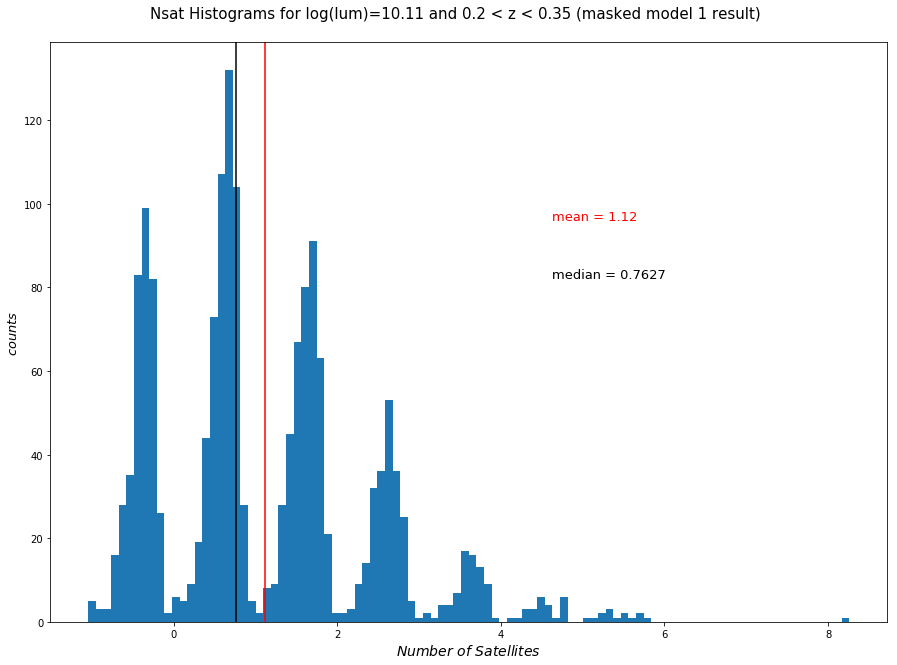

mean number of satellites is 1.2105509798074026
median number of satellites is 0.9586920283265148


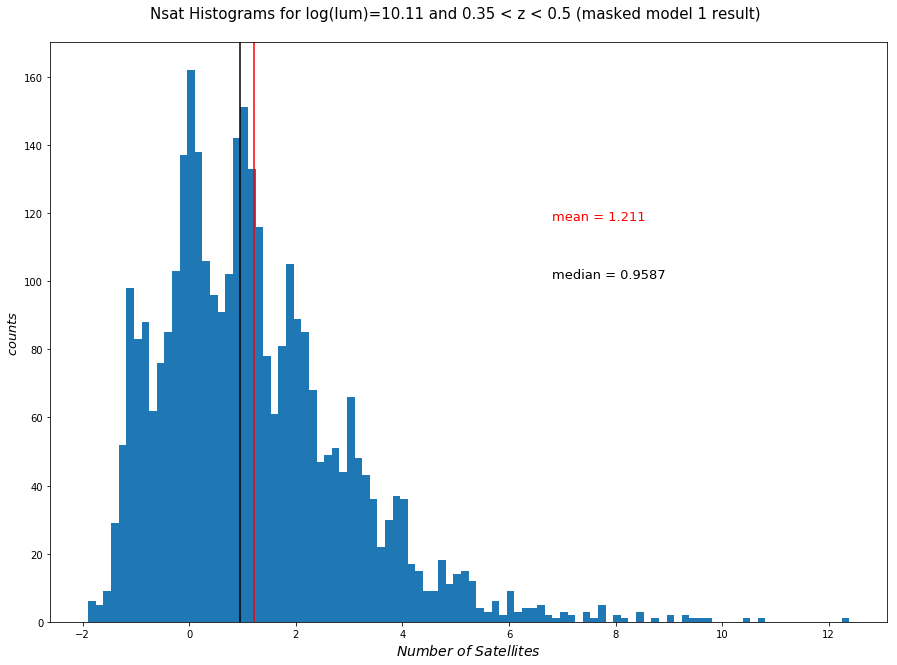

In [68]:
# sum each Nsat and plot histogram

low_sum35_mod1 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat35_1)):
    low_sum35_mod1.append(np.sum(masked_Nsat35_1[i]))
    
# temp = np.where(np.asarray(low_sum35_mod1) <= 0.)
# print(len(np.asarray(temp[0])))
    
low_mean35_mod1 = np.mean(low_sum35_mod1)
print("mean number of satellites is", low_mean35_mod1)

low_median35_mod1 = np.median(low_sum35_mod1)
print("median number of satellites is", low_median35_mod1)

fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
fig.suptitle('Nsat Histograms for log(lum)=10.11 and 0.2 < z < 0.35 (masked model 1 result)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(low_sum35_mod1, bins=100)
# ax1.set_title('Original Null Nsat Histogram (mask)', fontsize=14)
ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax1.set_ylabel(r'$counts$', fontsize=13)
ax1.axvline(x=low_mean35_mod1, color='r')
ax1.axvline(x=low_median35_mod1, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean35_mod1), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median35_mod1), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/original_low_null25_result.pdf')

plt.show()



# sum each Nsat and plot histogram

low_sum05_mod1 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat05_1)):
    low_sum05_mod1.append(np.sum(masked_Nsat05_1[i]))
    
# temp = np.where(np.asarray(low_sum35_mod1) <= 0.)
# print(len(np.asarray(temp[0])))
    
low_mean05_mod1 = np.mean(low_sum05_mod1)
print("mean number of satellites is", low_mean05_mod1)

low_median05_mod1 = np.median(low_sum05_mod1)
print("median number of satellites is", low_median05_mod1)

fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
fig.suptitle('Nsat Histograms for log(lum)=10.11 and 0.35 < z < 0.5 (masked model 1 result)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(low_sum05_mod1, bins=100)
# ax1.set_title('Original Null Nsat Histogram (mask)', fontsize=14)
ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax1.set_ylabel(r'$counts$', fontsize=13)
ax1.axvline(x=low_mean05_mod1, color='r')
ax1.axvline(x=low_median05_mod1, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean05_mod1), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median05_mod1), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/original_low_null25_result.pdf')

plt.show()



mean number of satellites is 2.0656877787235604
median number of satellites is 1.7530242781250758


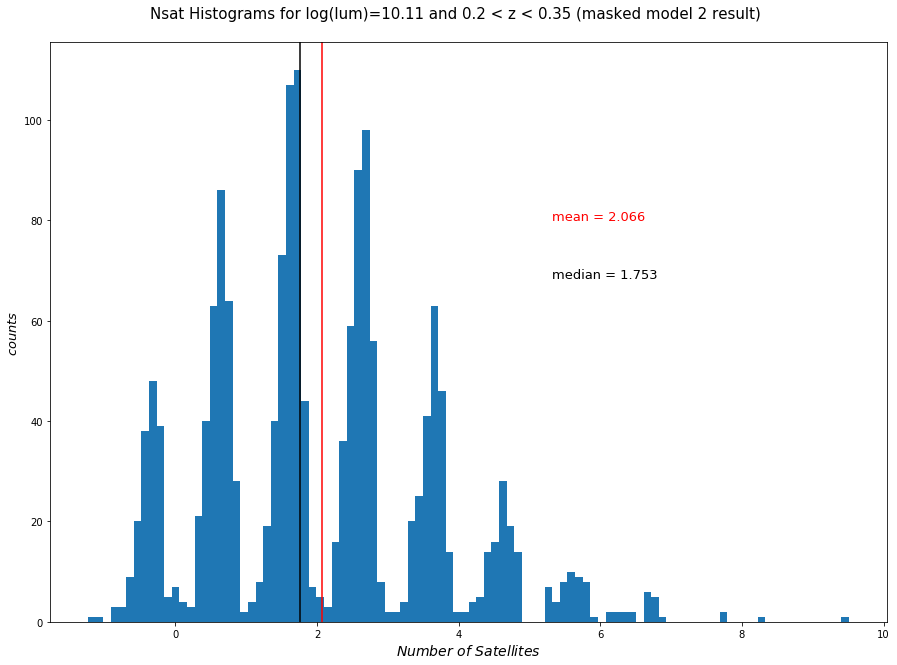

mean number of satellites is 2.206359363040936
median number of satellites is 1.9825442590711972


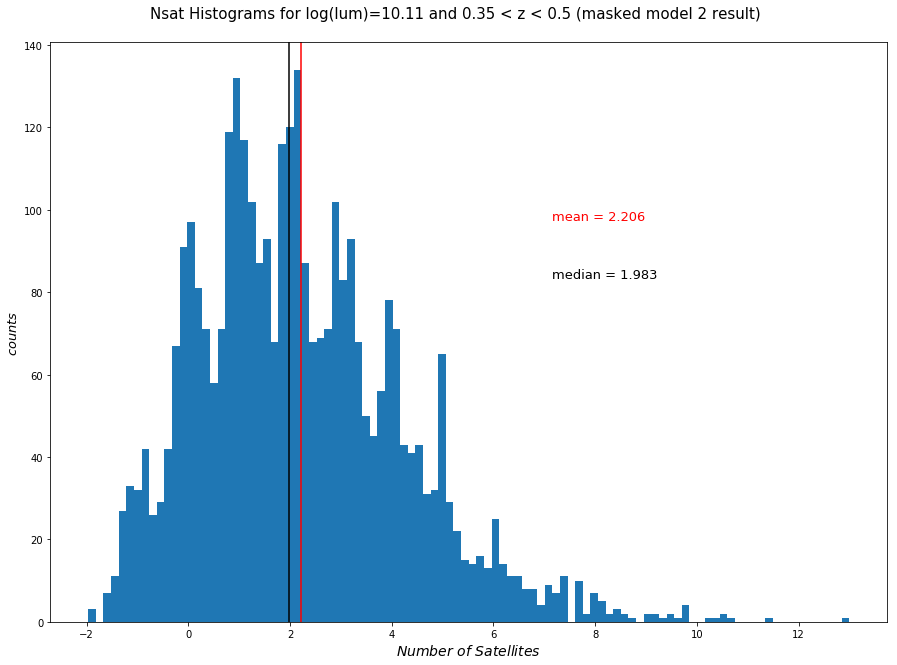

In [70]:
# sum each Nsat and plot histogram

low_sum35_mod2 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat35_2)):
    low_sum35_mod2.append(np.sum(masked_Nsat35_2[i]))
    
# temp = np.where(np.asarray(low_sum35_mod1) <= 0.)
# print(len(np.asarray(temp[0])))
    
low_mean35_mod2 = np.mean(low_sum35_mod2)
print("mean number of satellites is", low_mean35_mod2)

low_median35_mod2 = np.median(low_sum35_mod2)
print("median number of satellites is", low_median35_mod2)

fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
fig.suptitle('Nsat Histograms for log(lum)=10.11 and 0.2 < z < 0.35 (masked model 2 result)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(low_sum35_mod2, bins=100)
# ax1.set_title('Original Null Nsat Histogram (mask)', fontsize=14)
ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax1.set_ylabel(r'$counts$', fontsize=13)
ax1.axvline(x=low_mean35_mod2, color='r')
ax1.axvline(x=low_median35_mod2, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean35_mod2), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median35_mod2), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/original_low_null25_result.pdf')

plt.show()



# sum each Nsat and plot histogram

low_sum05_mod2 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat05_2)):
    low_sum05_mod2.append(np.sum(masked_Nsat05_2[i]))
    
# temp = np.where(np.asarray(low_sum35_mod1) <= 0.)
# print(len(np.asarray(temp[0])))
    
low_mean05_mod2 = np.mean(low_sum05_mod2)
print("mean number of satellites is", low_mean05_mod2)

low_median05_mod2 = np.median(low_sum05_mod2)
print("median number of satellites is", low_median05_mod2)

fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
fig.suptitle('Nsat Histograms for log(lum)=10.11 and 0.35 < z < 0.5 (masked model 2 result)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(low_sum05_mod2, bins=100)
# ax1.set_title('Original Null Nsat Histogram (mask)', fontsize=14)
ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax1.set_ylabel(r'$counts$', fontsize=13)
ax1.axvline(x=low_mean05_mod2, color='r')
ax1.axvline(x=low_median05_mod2, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean05_mod2), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median05_mod2), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/original_low_null25_result.pdf')

plt.show()



mean number of satellites is 3.1054468148681384
median number of satellites is 2.7700978437875934


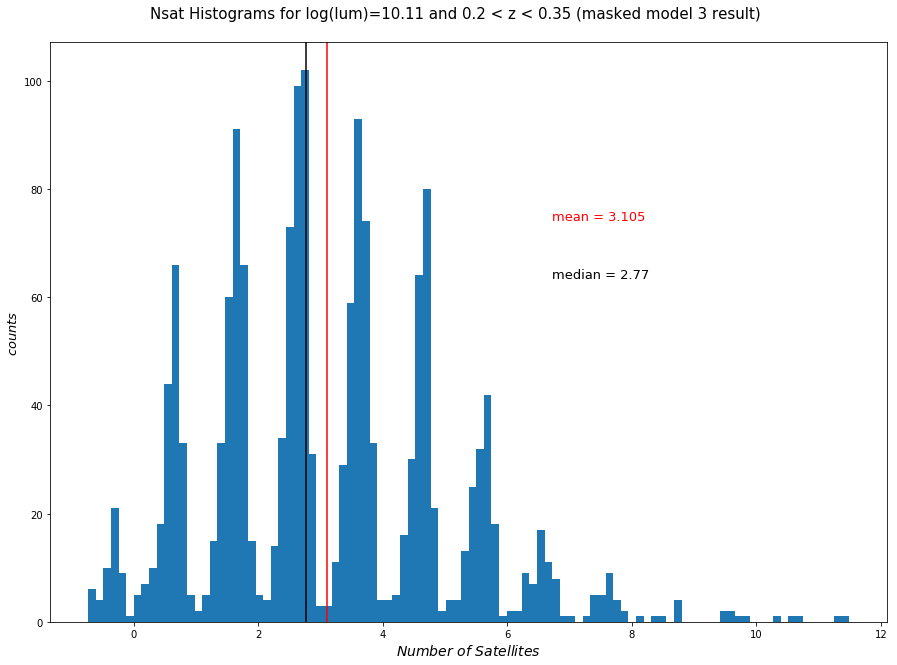

mean number of satellites is 3.223125830106804
median number of satellites is 3.031174671348449


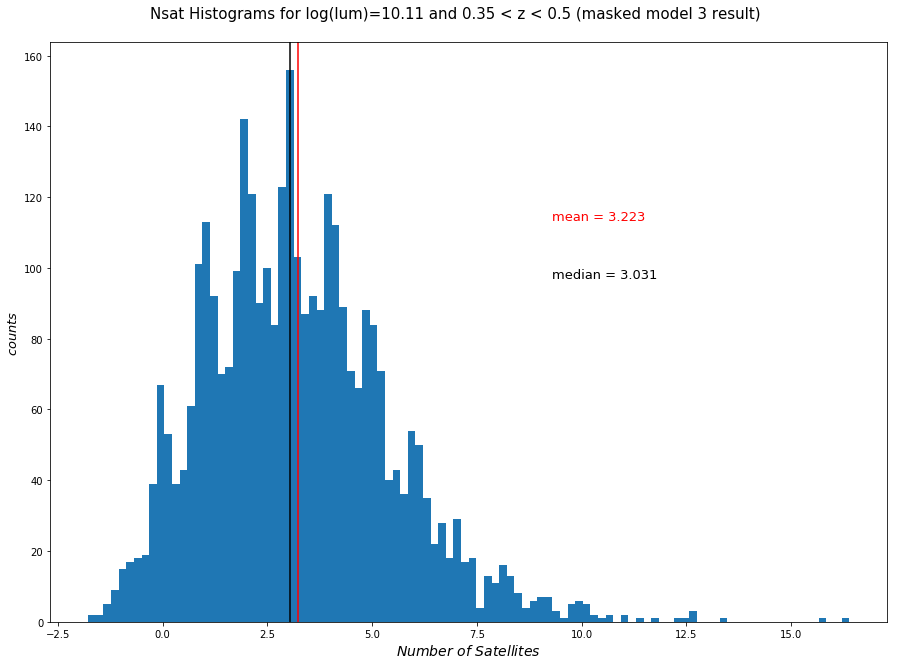

In [71]:
# sum each Nsat and plot histogram

low_sum35_mod3 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat35_3)):
    low_sum35_mod3.append(np.sum(masked_Nsat35_3[i]))
    
# temp = np.where(np.asarray(low_sum35_mod1) <= 0.)
# print(len(np.asarray(temp[0])))
    
low_mean35_mod3 = np.mean(low_sum35_mod3)
print("mean number of satellites is", low_mean35_mod3)

low_median35_mod3 = np.median(low_sum35_mod3)
print("median number of satellites is", low_median35_mod3)

fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
fig.suptitle('Nsat Histograms for log(lum)=10.11 and 0.2 < z < 0.35 (masked model 3 result)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(low_sum35_mod3, bins=100)
# ax1.set_title('Original Null Nsat Histogram (mask)', fontsize=14)
ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax1.set_ylabel(r'$counts$', fontsize=13)
ax1.axvline(x=low_mean35_mod3, color='r')
ax1.axvline(x=low_median35_mod3, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean35_mod3), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median35_mod3), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/original_low_null25_result.pdf')

plt.show()



# sum each Nsat and plot histogram

low_sum05_mod3 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat05_3)):
    low_sum05_mod3.append(np.sum(masked_Nsat05_3[i]))
    
# temp = np.where(np.asarray(low_sum35_mod1) <= 0.)
# print(len(np.asarray(temp[0])))
    
low_mean05_mod3 = np.mean(low_sum05_mod3)
print("mean number of satellites is", low_mean05_mod3)

low_median05_mod3 = np.median(low_sum05_mod3)
print("median number of satellites is", low_median05_mod3)

fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
fig.suptitle('Nsat Histograms for log(lum)=10.11 and 0.35 < z < 0.5 (masked model 3 result)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(low_sum05_mod3, bins=100)
# ax1.set_title('Original Null Nsat Histogram (mask)', fontsize=14)
ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax1.set_ylabel(r'$counts$', fontsize=13)
ax1.axvline(x=low_mean05_mod3, color='r')
ax1.axvline(x=low_median05_mod3, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean05_mod3), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median05_mod3), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/original_low_null25_result.pdf')

plt.show()



mean number of satellites is 4.066290188362115
median number of satellites is 3.7434152126040865


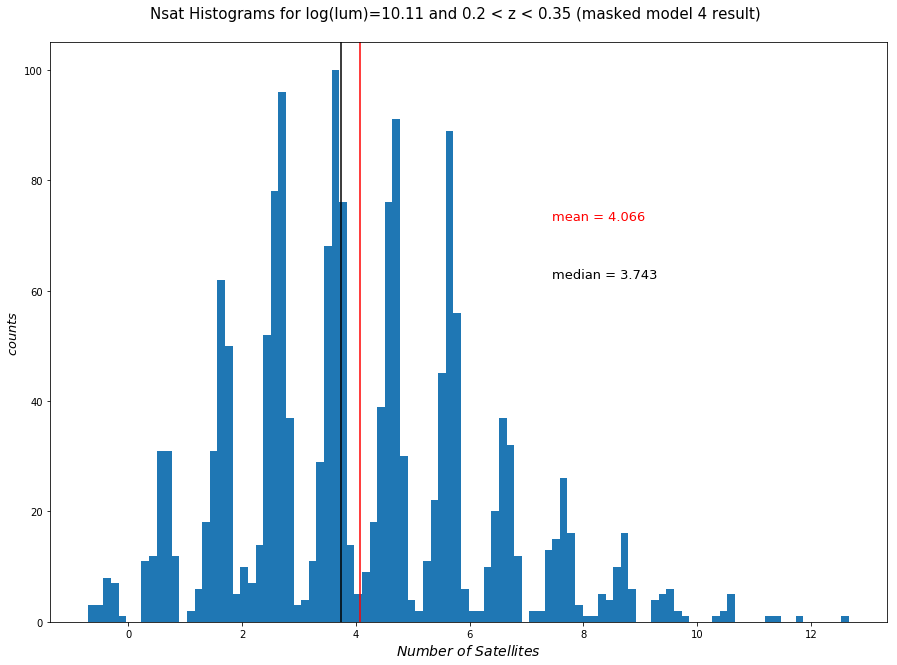

mean number of satellites is 4.134503075615786
median number of satellites is 3.9622180917851884


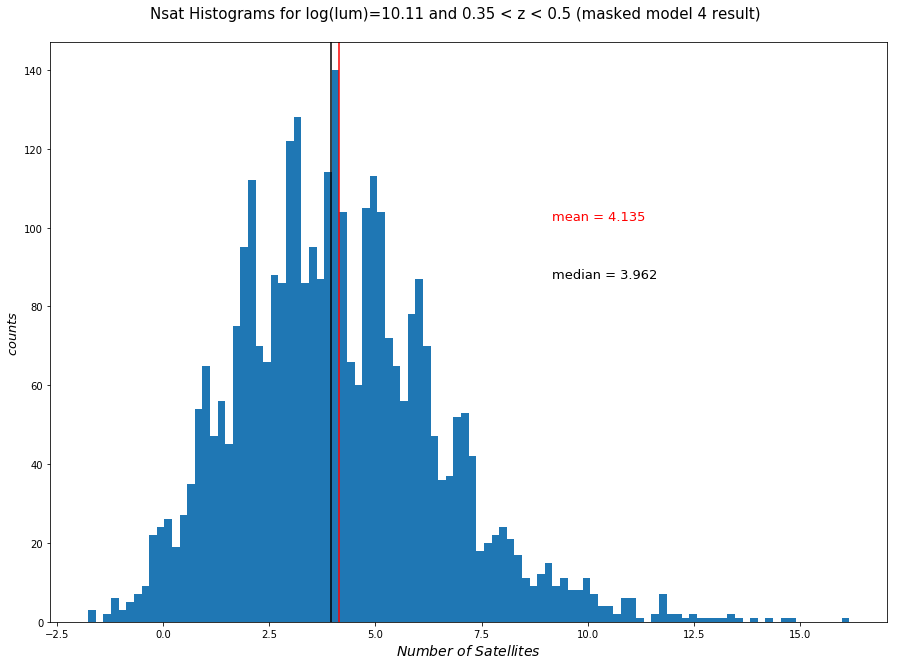

In [72]:
# sum each Nsat and plot histogram

low_sum35_mod4 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat35_4)):
    low_sum35_mod4.append(np.sum(masked_Nsat35_4[i]))
    
# temp = np.where(np.asarray(low_sum35_mod1) <= 0.)
# print(len(np.asarray(temp[0])))
    
low_mean35_mod4 = np.mean(low_sum35_mod4)
print("mean number of satellites is", low_mean35_mod4)

low_median35_mod4 = np.median(low_sum35_mod4)
print("median number of satellites is", low_median35_mod4)

fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
fig.suptitle('Nsat Histograms for log(lum)=10.11 and 0.2 < z < 0.35 (masked model 4 result)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(low_sum35_mod4, bins=100)
# ax1.set_title('Original Null Nsat Histogram (mask)', fontsize=14)
ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax1.set_ylabel(r'$counts$', fontsize=13)
ax1.axvline(x=low_mean35_mod4, color='r')
ax1.axvline(x=low_median35_mod4, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean35_mod4), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median35_mod4), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/original_low_null25_result.pdf')

plt.show()



# sum each Nsat and plot histogram

low_sum05_mod4 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat05_4)):
    low_sum05_mod4.append(np.sum(masked_Nsat05_4[i]))
    
# temp = np.where(np.asarray(low_sum35_mod1) <= 0.)
# print(len(np.asarray(temp[0])))
    
low_mean05_mod4 = np.mean(low_sum05_mod4)
print("mean number of satellites is", low_mean05_mod4)

low_median05_mod4 = np.median(low_sum05_mod4)
print("median number of satellites is", low_median05_mod4)

fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
fig.suptitle('Nsat Histograms for log(lum)=10.11 and 0.35 < z < 0.5 (masked model 4 result)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(low_sum05_mod4, bins=100)
# ax1.set_title('Original Null Nsat Histogram (mask)', fontsize=14)
ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax1.set_ylabel(r'$counts$', fontsize=13)
ax1.axvline(x=low_mean05_mod4, color='r')
ax1.axvline(x=low_median05_mod4, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean05_mod4), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median05_mod4), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/original_low_null25_result.pdf')

plt.show()



mean number of satellites is 5.129543200410307
median number of satellites is 4.766758047185236


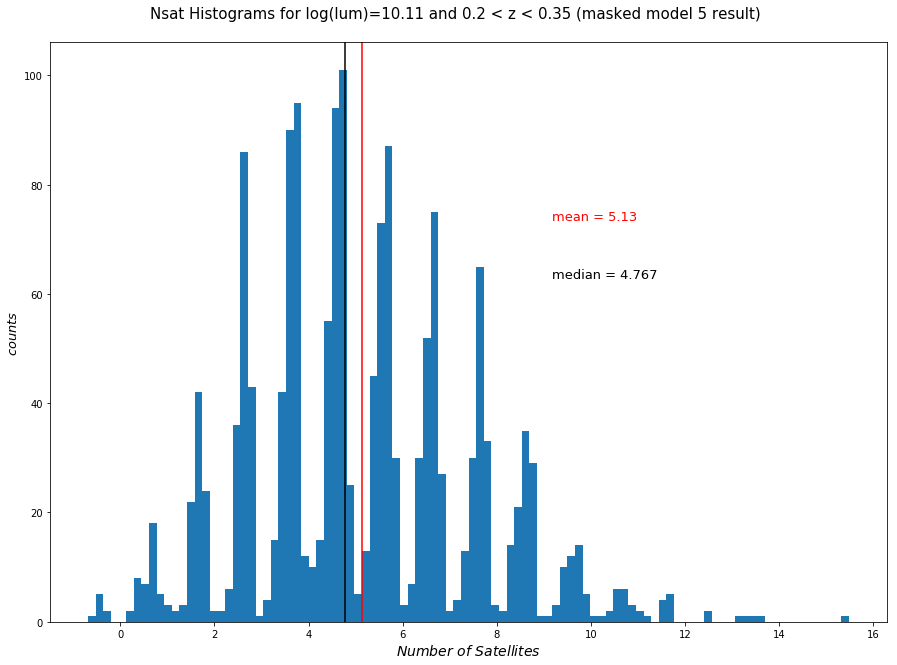

mean number of satellites is 5.198874333100815
median number of satellites is 4.997713503142796


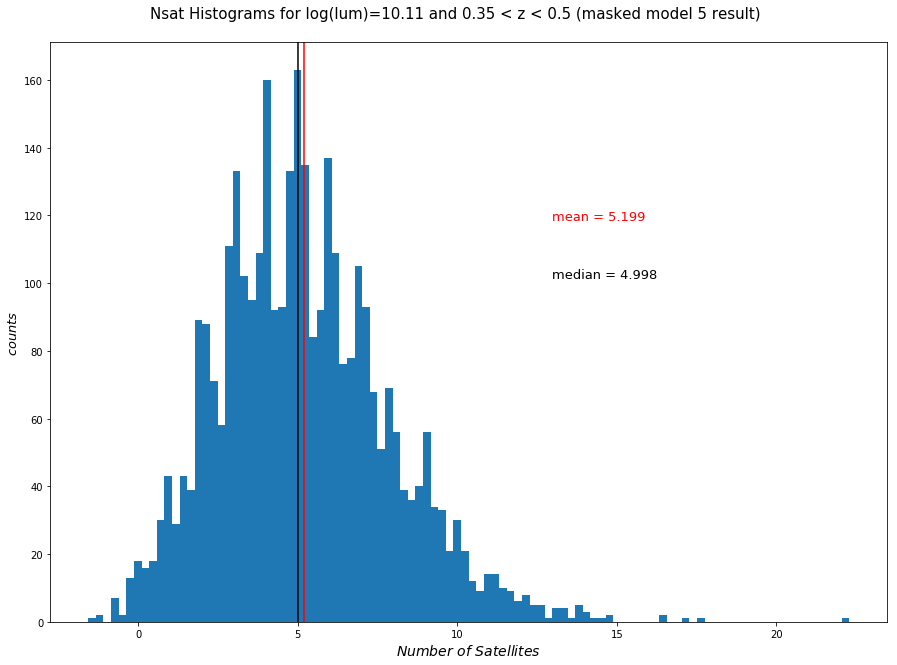

In [75]:
# sum each Nsat and plot histogram

low_sum35_mod5 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat35_5)):
    low_sum35_mod5.append(np.sum(masked_Nsat35_5[i]))
    
# temp = np.where(np.asarray(low_sum35_mod1) <= 0.)
# print(len(np.asarray(temp[0])))
    
low_mean35_mod5 = np.mean(low_sum35_mod5)
print("mean number of satellites is", low_mean35_mod5)

low_median35_mod5 = np.median(low_sum35_mod5)
print("median number of satellites is", low_median35_mod5)

fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
fig.suptitle('Nsat Histograms for log(lum)=10.11 and 0.2 < z < 0.35 (masked model 5 result)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(low_sum35_mod5, bins=100)
# ax1.set_title('Original Null Nsat Histogram (mask)', fontsize=14)
ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax1.set_ylabel(r'$counts$', fontsize=13)
ax1.axvline(x=low_mean35_mod5, color='r')
ax1.axvline(x=low_median35_mod5, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean35_mod5), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median35_mod5), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/original_low_null25_result.pdf')

plt.show()



# sum each Nsat and plot histogram

low_sum05_mod5 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat05_5)):
    low_sum05_mod5.append(np.sum(masked_Nsat05_5[i]))
    
# temp = np.where(np.asarray(low_sum35_mod1) <= 0.)
# print(len(np.asarray(temp[0])))
    
low_mean05_mod5 = np.mean(low_sum05_mod5)
print("mean number of satellites is", low_mean05_mod5)

low_median05_mod5 = np.median(low_sum05_mod5)
print("median number of satellites is", low_median05_mod5)

fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
fig.suptitle('Nsat Histograms for log(lum)=10.11 and 0.35 < z < 0.5 (masked model 5 result)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(low_sum05_mod5, bins=100)
# ax1.set_title('Original Null Nsat Histogram (mask)', fontsize=14)
ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax1.set_ylabel(r'$counts$', fontsize=13)
ax1.axvline(x=low_mean05_mod5, color='r')
ax1.axvline(x=low_median05_mod5, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean05_mod5), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median05_mod5), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/original_low_null25_result.pdf')

plt.show()



mean number of satellites is 6.064482959446452
median number of satellites is 5.747786036762828


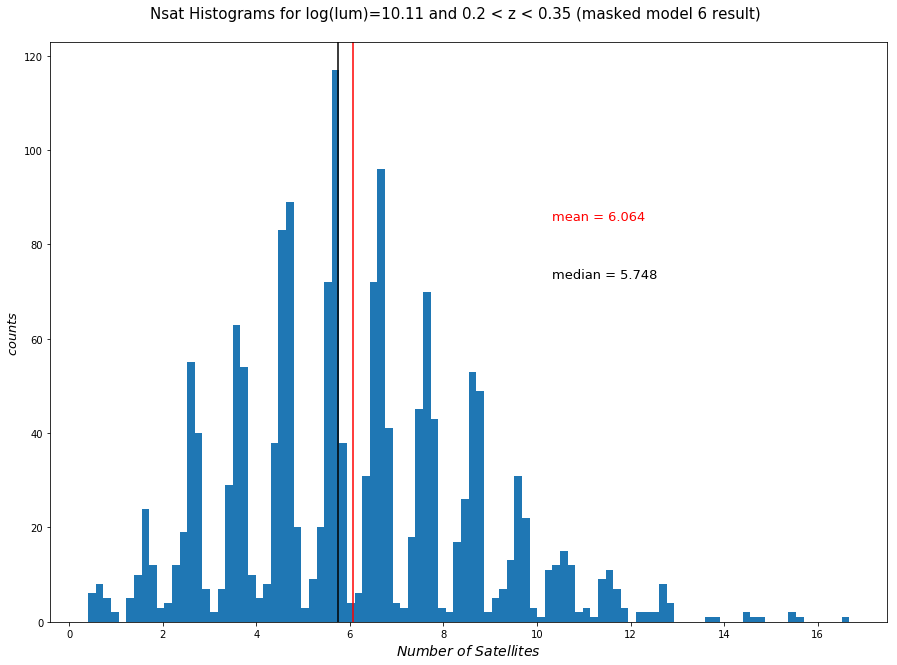

mean number of satellites is 6.230311458849318
median number of satellites is 6.013034835322155


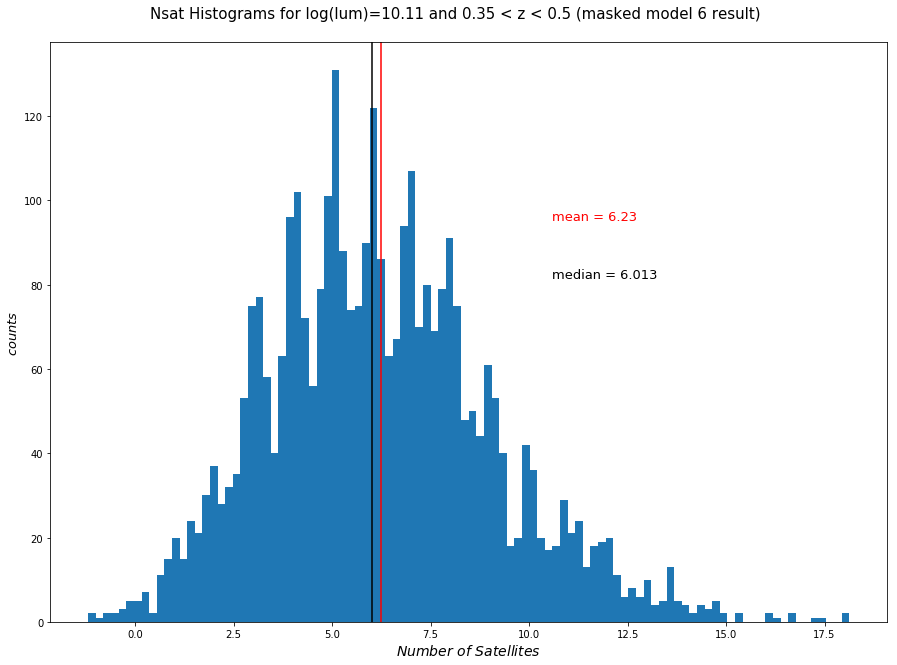

In [76]:
# sum each Nsat and plot histogram

low_sum35_mod6 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat35_6)):
    low_sum35_mod6.append(np.sum(masked_Nsat35_6[i]))
    
# temp = np.where(np.asarray(low_sum35_mod1) <= 0.)
# print(len(np.asarray(temp[0])))
    
low_mean35_mod6 = np.mean(low_sum35_mod6)
print("mean number of satellites is", low_mean35_mod6)

low_median35_mod6 = np.median(low_sum35_mod6)
print("median number of satellites is", low_median35_mod6)

fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
fig.suptitle('Nsat Histograms for log(lum)=10.11 and 0.2 < z < 0.35 (masked model 6 result)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(low_sum35_mod6, bins=100)
# ax1.set_title('Original Null Nsat Histogram (mask)', fontsize=14)
ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax1.set_ylabel(r'$counts$', fontsize=13)
ax1.axvline(x=low_mean35_mod6, color='r')
ax1.axvline(x=low_median35_mod6, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean35_mod6), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median35_mod6), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/original_low_null25_result.pdf')

plt.show()



# sum each Nsat and plot histogram

low_sum05_mod6 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat05_6)):
    low_sum05_mod6.append(np.sum(masked_Nsat05_6[i]))
    
# temp = np.where(np.asarray(low_sum35_mod1) <= 0.)
# print(len(np.asarray(temp[0])))
    
low_mean05_mod6 = np.mean(low_sum05_mod6)
print("mean number of satellites is", low_mean05_mod6)

low_median05_mod6 = np.median(low_sum05_mod6)
print("median number of satellites is", low_median05_mod6)

fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
fig.suptitle('Nsat Histograms for log(lum)=10.11 and 0.35 < z < 0.5 (masked model 6 result)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(low_sum05_mod6, bins=100)
# ax1.set_title('Original Null Nsat Histogram (mask)', fontsize=14)
ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax1.set_ylabel(r'$counts$', fontsize=13)
ax1.axvline(x=low_mean05_mod6, color='r')
ax1.axvline(x=low_median05_mod6, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean05_mod6), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median05_mod6), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/original_low_null25_result.pdf')

plt.show()



mean number of satellites is 7.1247239233018735
median number of satellites is 6.747839151410475


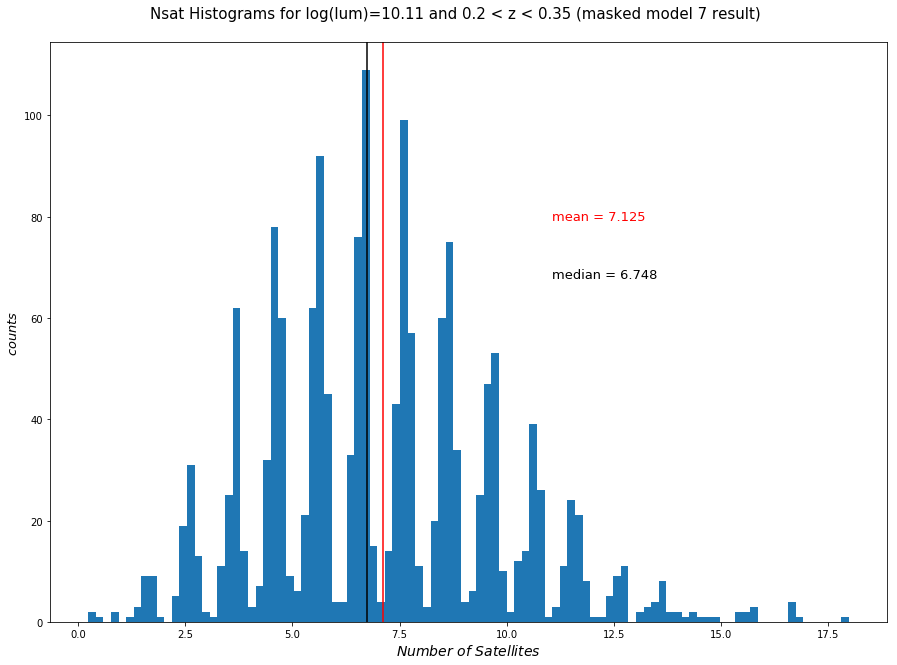

mean number of satellites is 7.280311458849318
median number of satellites is 7.073745339063627


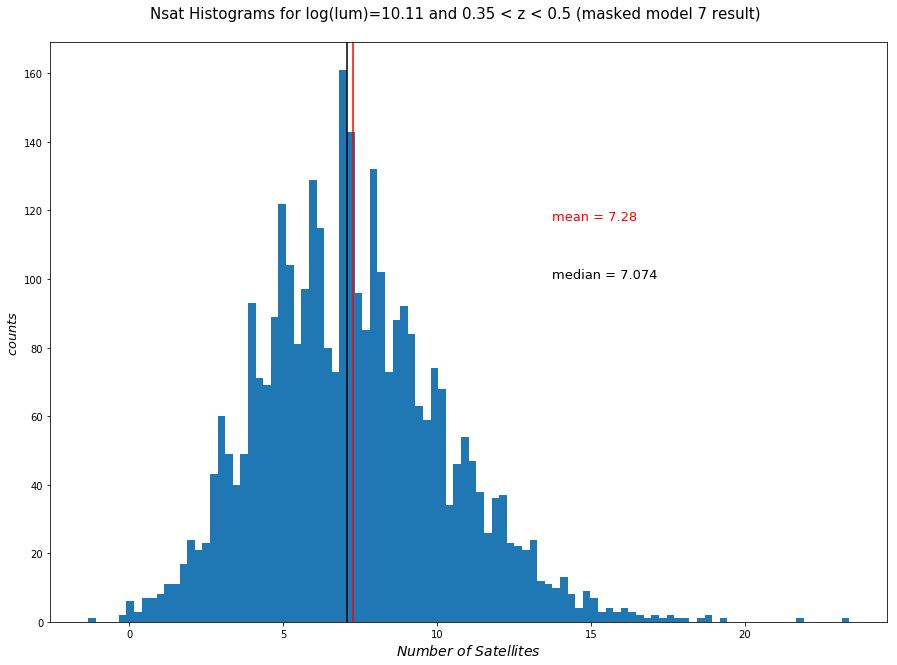

In [77]:
# sum each Nsat and plot histogram

low_sum35_mod7 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat35_7)):
    low_sum35_mod7.append(np.sum(masked_Nsat35_7[i]))
    
# temp = np.where(np.asarray(low_sum35_mod1) <= 0.)
# print(len(np.asarray(temp[0])))
    
low_mean35_mod7 = np.mean(low_sum35_mod7)
print("mean number of satellites is", low_mean35_mod7)

low_median35_mod7 = np.median(low_sum35_mod7)
print("median number of satellites is", low_median35_mod7)

fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
fig.suptitle('Nsat Histograms for log(lum)=10.11 and 0.2 < z < 0.35 (masked model 7 result)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(low_sum35_mod7, bins=100)
# ax1.set_title('Original Null Nsat Histogram (mask)', fontsize=14)
ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax1.set_ylabel(r'$counts$', fontsize=13)
ax1.axvline(x=low_mean35_mod7, color='r')
ax1.axvline(x=low_median35_mod7, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean35_mod7), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median35_mod7), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/original_low_null25_result.pdf')

plt.show()



# sum each Nsat and plot histogram

low_sum05_mod7 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat05_7)):
    low_sum05_mod7.append(np.sum(masked_Nsat05_7[i]))
    
# temp = np.where(np.asarray(low_sum35_mod1) <= 0.)
# print(len(np.asarray(temp[0])))
    
low_mean05_mod7 = np.mean(low_sum05_mod7)
print("mean number of satellites is", low_mean05_mod7)

low_median05_mod7 = np.median(low_sum05_mod7)
print("median number of satellites is", low_median05_mod7)

fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
fig.suptitle('Nsat Histograms for log(lum)=10.11 and 0.35 < z < 0.5 (masked model 7 result)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(low_sum05_mod7, bins=100)
# ax1.set_title('Original Null Nsat Histogram (mask)', fontsize=14)
ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax1.set_ylabel(r'$counts$', fontsize=13)
ax1.axvline(x=low_mean05_mod7, color='r')
ax1.axvline(x=low_median05_mod7, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean05_mod7), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median05_mod7), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/original_low_null25_result.pdf')

plt.show()



mean number of satellites is 7.957856453422356
median number of satellites is 7.694815405757742


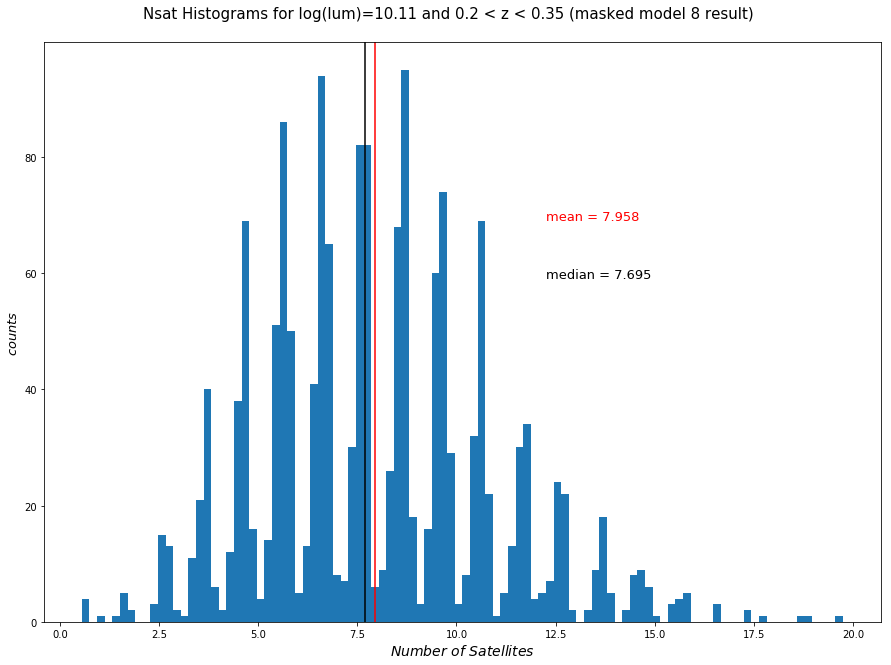

mean number of satellites is 8.23360487202297
median number of satellites is 8.01183330759456


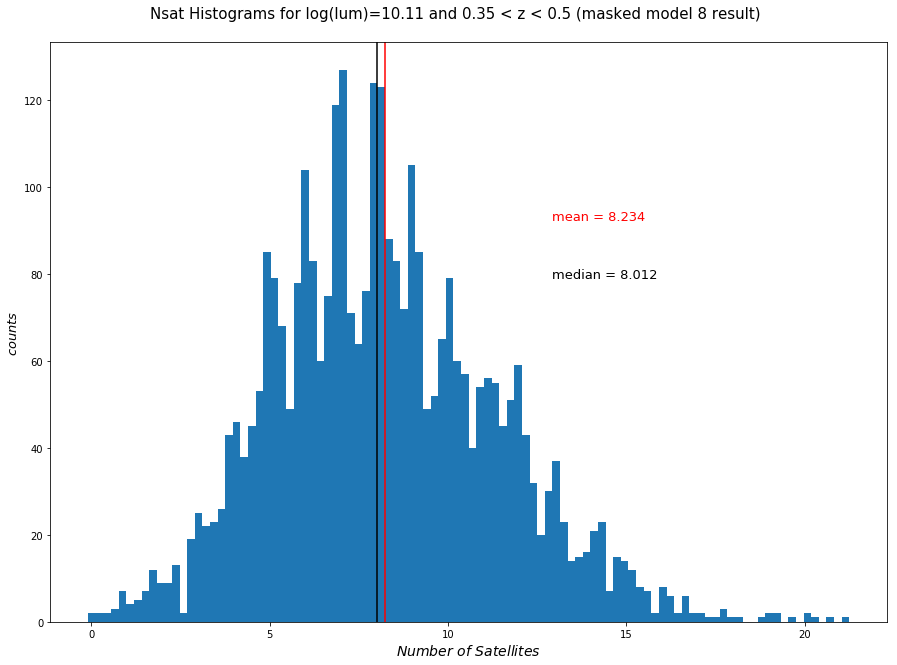

In [78]:
# sum each Nsat and plot histogram

low_sum35_mod8 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat35_8)):
    low_sum35_mod8.append(np.sum(masked_Nsat35_8[i]))
    
# temp = np.where(np.asarray(low_sum35_mod1) <= 0.)
# print(len(np.asarray(temp[0])))
    
low_mean35_mod8 = np.mean(low_sum35_mod8)
print("mean number of satellites is", low_mean35_mod8)

low_median35_mod8 = np.median(low_sum35_mod8)
print("median number of satellites is", low_median35_mod8)

fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
fig.suptitle('Nsat Histograms for log(lum)=10.11 and 0.2 < z < 0.35 (masked model 8 result)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(low_sum35_mod8, bins=100)
# ax1.set_title('Original Null Nsat Histogram (mask)', fontsize=14)
ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax1.set_ylabel(r'$counts$', fontsize=13)
ax1.axvline(x=low_mean35_mod8, color='r')
ax1.axvline(x=low_median35_mod8, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean35_mod8), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median35_mod8), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/original_low_null25_result.pdf')

plt.show()



# sum each Nsat and plot histogram

low_sum05_mod8 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat05_8)):
    low_sum05_mod8.append(np.sum(masked_Nsat05_8[i]))
    
# temp = np.where(np.asarray(low_sum35_mod1) <= 0.)
# print(len(np.asarray(temp[0])))
    
low_mean05_mod8 = np.mean(low_sum05_mod8)
print("mean number of satellites is", low_mean05_mod8)

low_median05_mod8 = np.median(low_sum05_mod8)
print("median number of satellites is", low_median05_mod8)

fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
fig.suptitle('Nsat Histograms for log(lum)=10.11 and 0.35 < z < 0.5 (masked model 8 result)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(low_sum05_mod8, bins=100)
# ax1.set_title('Original Null Nsat Histogram (mask)', fontsize=14)
ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax1.set_ylabel(r'$counts$', fontsize=13)
ax1.axvline(x=low_mean05_mod8, color='r')
ax1.axvline(x=low_median05_mod8, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean05_mod8), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median05_mod8), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/original_low_null25_result.pdf')

plt.show()



mean number of satellites is 8.339552330237737
median number of satellites is 8.124122873628234


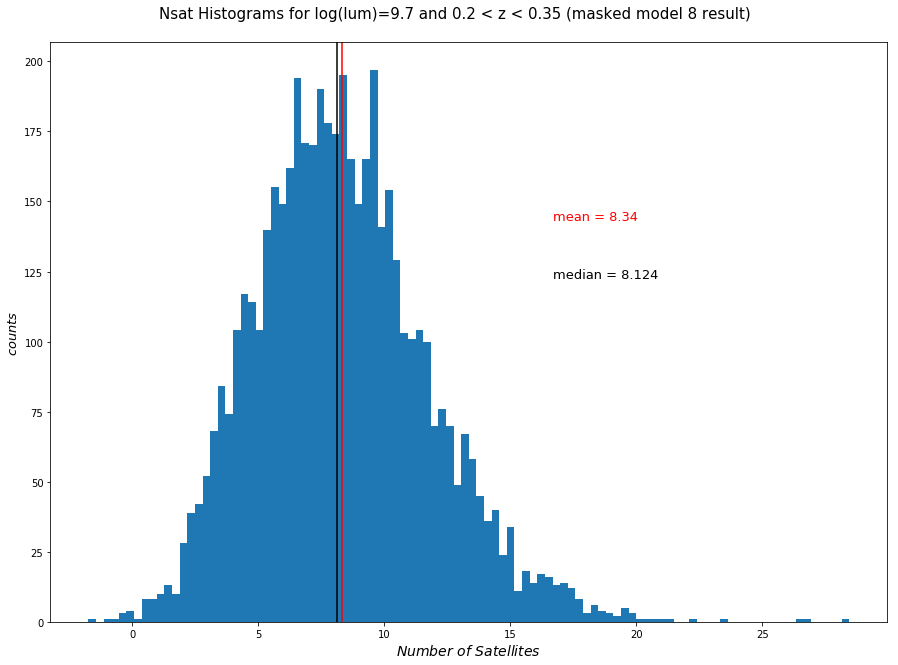

In [137]:
# sum each Nsat and plot histogram

test_mod8 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_test_mod8)):
    test_mod8.append(np.sum(masked_test_mod8[i]))
    
mask_test_mod8 = np.array(test_mod8)
    
low_mean35_mod8 = np.mean(mask_test_mod8)
print("mean number of satellites is", low_mean35_mod8)

low_median35_mod8 = np.median(mask_test_mod8)
print("median number of satellites is", low_median35_mod8)

fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
fig.suptitle('Nsat Histograms for log(lum)=9.7 and 0.2 < z < 0.35 (masked model 8 result)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(mask_test_mod8, bins=100)
# ax1.hist(model8_sum[np.where(mask_model8 < 0.)], bins=100)
# ax1.set_title('Original Null Nsat Histogram (mask)', fontsize=14)
ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax1.set_ylabel(r'$counts$', fontsize=13)
ax1.axvline(x=low_mean35_mod8, color='r')
ax1.axvline(x=low_median35_mod8, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean35_mod8), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median35_mod8), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/original_low_null25_result.pdf')

plt.show()

mean number of satellites is 8.339552330237737
median number of satellites is 8.124122873628234


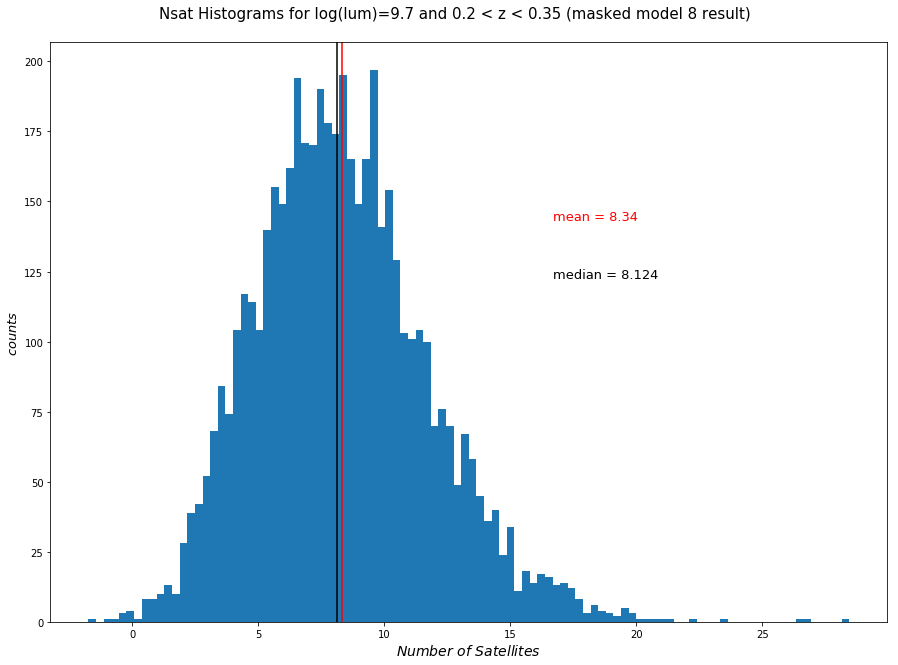

In [131]:
# sum each Nsat and plot histogram

test_mod82 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_test_mod82)):
    test_mod82.append(np.sum(masked_test_mod82[i]))
    
mask_test_mod82 = np.array(test_mod82)
    
low_mean35_mod82 = np.mean(mask_test_mod82)
print("mean number of satellites is", low_mean35_mod82)

low_median35_mod82 = np.median(mask_test_mod82)
print("median number of satellites is", low_median35_mod82)

fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
fig.suptitle('Nsat Histograms for log(lum)=9.7 and 0.2 < z < 0.35 (masked model 8 result)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(mask_test_mod82, bins=100)
# ax1.hist(model8_sum[np.where(mask_model8 < 0.)], bins=100)
# ax1.set_title('Original Null Nsat Histogram (mask)', fontsize=14)
ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax1.set_ylabel(r'$counts$', fontsize=13)
ax1.axvline(x=low_mean35_mod82, color='r')
ax1.axvline(x=low_median35_mod82, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean35_mod82), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median35_mod82), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/18Dec2020/model8-boosted-zmag.pdf')

plt.show()

mean number of satellites is 0.3713523302377361
median number of satellites is -0.007246479730776578


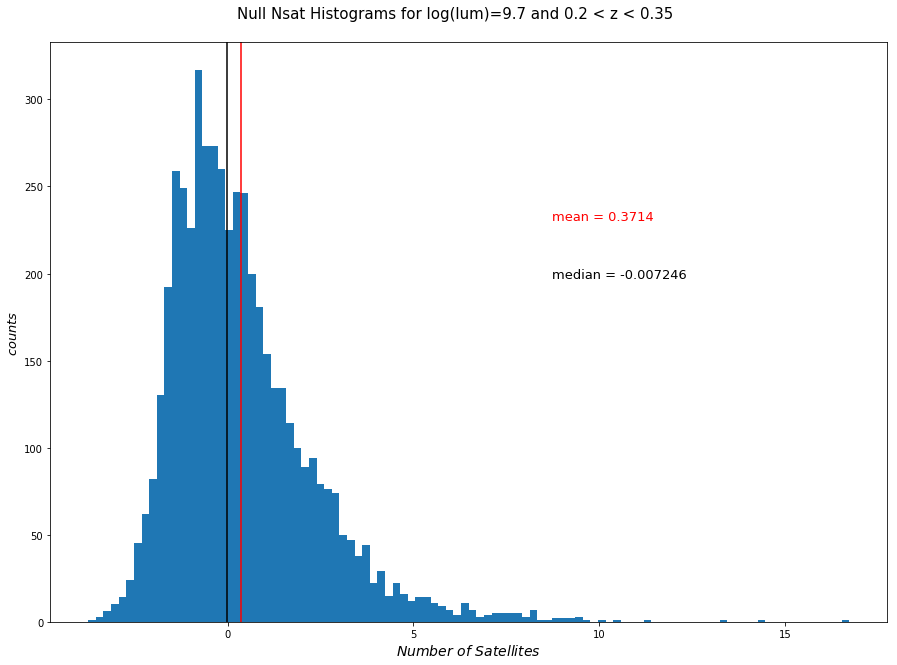

In [123]:
# sum each Nsat and plot histogram

# apply mask to null_Nsat

masked_Nsat = []
for i in range(len(null_Nsat)):
    masked_Nsat.append(null_Nsat[i] * smatrix_low35)
    
# masked version
sum_mask = []
for i in range(len(masked_Nsat)):
    sum_mask.append(np.sum(masked_Nsat[i]))
    
mask_sum = np.array(sum_mask)

# unmasked version
null_sum35 = []
# Sum up number of near neighbors for every LRG
for i in range(len(null_Nsat)):
    null_sum35.append(np.sum(null_Nsat[i]))
    
null_sum = np.array(null_sum35)
    
null_mean = np.mean(mask_sum)
print("mean number of satellites is", null_mean)

null_median = np.median(mask_sum)
print("median number of satellites is", null_median)

fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
fig.suptitle('Null Nsat Histograms for log(lum)=9.7 and 0.2 < z < 0.35', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(mask_sum, bins=100)
# ax1.hist(null_sum[np.where(mask_model8 < 0.)], bins=100)
# ax1.set_title('Original Null Nsat Histogram (mask)', fontsize=14)
ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax1.set_ylabel(r'$counts$', fontsize=13)
ax1.axvline(x=null_mean, color='r')
ax1.axvline(x=null_median, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(null_mean), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(null_median), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/original_low_null25_result.pdf')

plt.show()

null mean -1.494821698468534
null median -1.4415031475099869

null mean -1.488962323468534
null median -1.4383850815787749


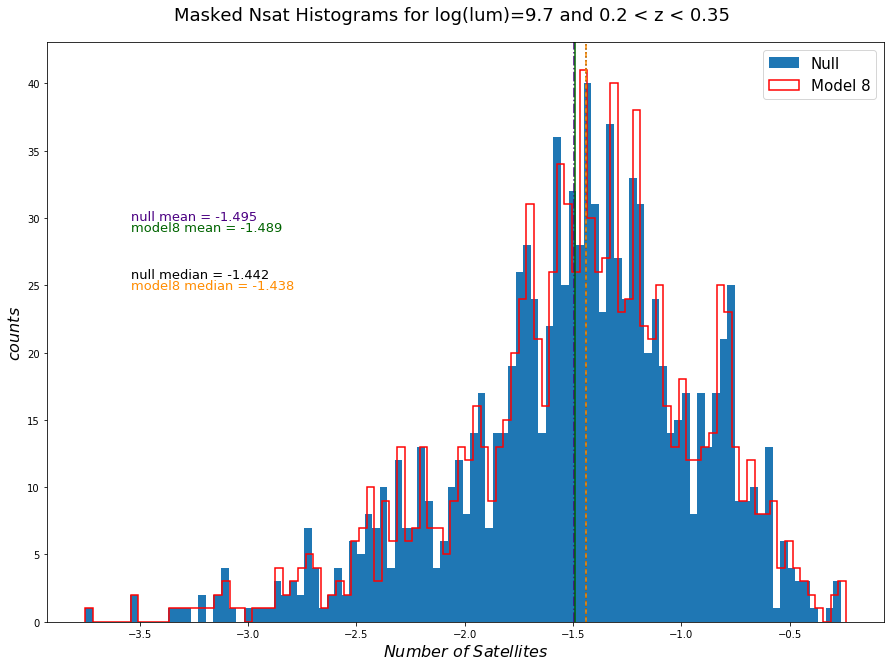

In [90]:
# plot histograms for masked model8 and masked null Nsat

null_mean = np.mean(mask_sum[np.where(mask_model8 < 0.)])
print("null mean", null_mean)

null_median = np.median(mask_sum[np.where(mask_model8 < 0.)])
print("null median", null_median)

print()

model8_mean = np.mean(mask_model8[np.where(mask_model8 < 0.)])
print("null mean", model8_mean)

model8_median = np.median(mask_model8[np.where(mask_model8 < 0.)])
print("null median", model8_median)

fig, (ax1) = plt.subplots(1, 1, figsize=(15,10), sharex=True)
fig.suptitle('Masked Nsat Histograms for log(lum)=9.7 and 0.2 < z < 0.35', fontsize=18)
fig.subplots_adjust(top=0.93)

ax1.hist(mask_sum[np.where(mask_model8 < 0.)], bins=100, label='Null')
ax1.hist(mask_model8[np.where(mask_model8 < 0.)], bins=100, histtype='step', edgecolor='red', linewidth=1.5, label='Model 8')

ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=16)
ax1.set_ylabel(r'$counts$', fontsize=16)

ax1.axvline(x=null_mean, color='indigo', linestyle='-.')
ax1.axvline(x=null_median, color='black', linestyle=':')
ax1.axvline(x=model8_mean, color='darkgreen', linestyle='-')
ax1.axvline(x=model8_median, color='darkorange', linestyle='--')
ax1.text(0.1, 0.7, 'null mean = {0:.4g}'.format(null_mean), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='indigo')
ax1.text(0.1, 0.6, 'null median = {0:.4g}'.format(null_median), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)
ax1.text(0.1, 0.68, 'model8 mean = {0:.4g}'.format(model8_mean), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='darkgreen')
ax1.text(0.1, 0.58, 'model8 median = {0:.4g}'.format(model8_median), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='darkorange')

ax1.legend(loc='best', fontsize=15)

plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/18Dec2020/Nsat_lt_0_masked.pdf')

plt.show()


null mean 4.627126877427506
null median 3.2960751874201497

null mean 12.594900314927507
null median 11.178992507782258


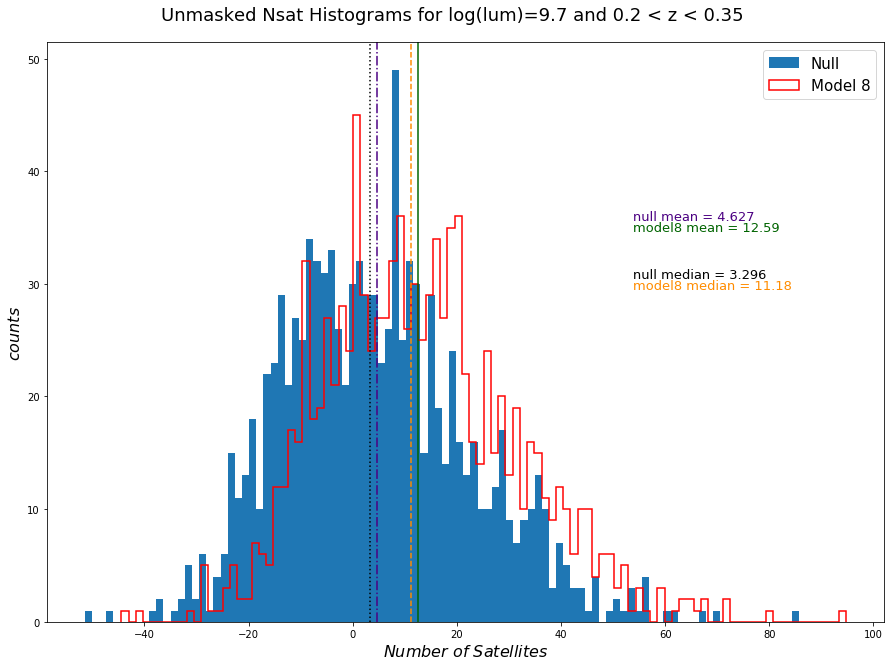

In [92]:
# plot histograms for unmasked model8 and masked null Nsat

null_mean = np.mean(null_sum[np.where(mask_model8 < 0.)])
print("null mean", null_mean)

null_median = np.median(null_sum[np.where(mask_model8 < 0.)])
print("null median", null_median)

print()

model8_mean = np.mean(model8_sum[np.where(mask_model8 < 0.)])
print("null mean", model8_mean)

model8_median = np.median(model8_sum[np.where(mask_model8 < 0.)])
print("null median", model8_median)

fig, (ax1) = plt.subplots(1, 1, figsize=(15,10), sharex=True)
fig.suptitle('Unmasked Nsat Histograms for log(lum)=9.7 and 0.2 < z < 0.35', fontsize=18)
fig.subplots_adjust(top=0.93)

ax1.hist(null_sum[np.where(mask_model8 < 0.)], bins=100, label='Null')
ax1.hist(model8_sum[np.where(mask_model8 < 0.)], bins=100, histtype='step', edgecolor='red', linewidth=1.5, label='Model 8')

ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=16)
ax1.set_ylabel(r'$counts$', fontsize=16)

ax1.axvline(x=null_mean, color='indigo', linestyle='-.')
ax1.axvline(x=null_median, color='black', linestyle=':')
ax1.axvline(x=model8_mean, color='darkgreen', linestyle='-')
ax1.axvline(x=model8_median, color='darkorange', linestyle='--')
ax1.text(0.7, 0.7, 'null mean = {0:.4g}'.format(null_mean), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='indigo')
ax1.text(0.7, 0.6, 'null median = {0:.4g}'.format(null_median), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)
ax1.text(0.7, 0.68, 'model8 mean = {0:.4g}'.format(model8_mean), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='darkgreen')
ax1.text(0.7, 0.58, 'model8 median = {0:.4g}'.format(model8_median), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='darkorange')


ax1.legend(loc='best', fontsize=15)

plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/18Dec2020/Nsat_lt_0_unmasked.pdf')

plt.show()


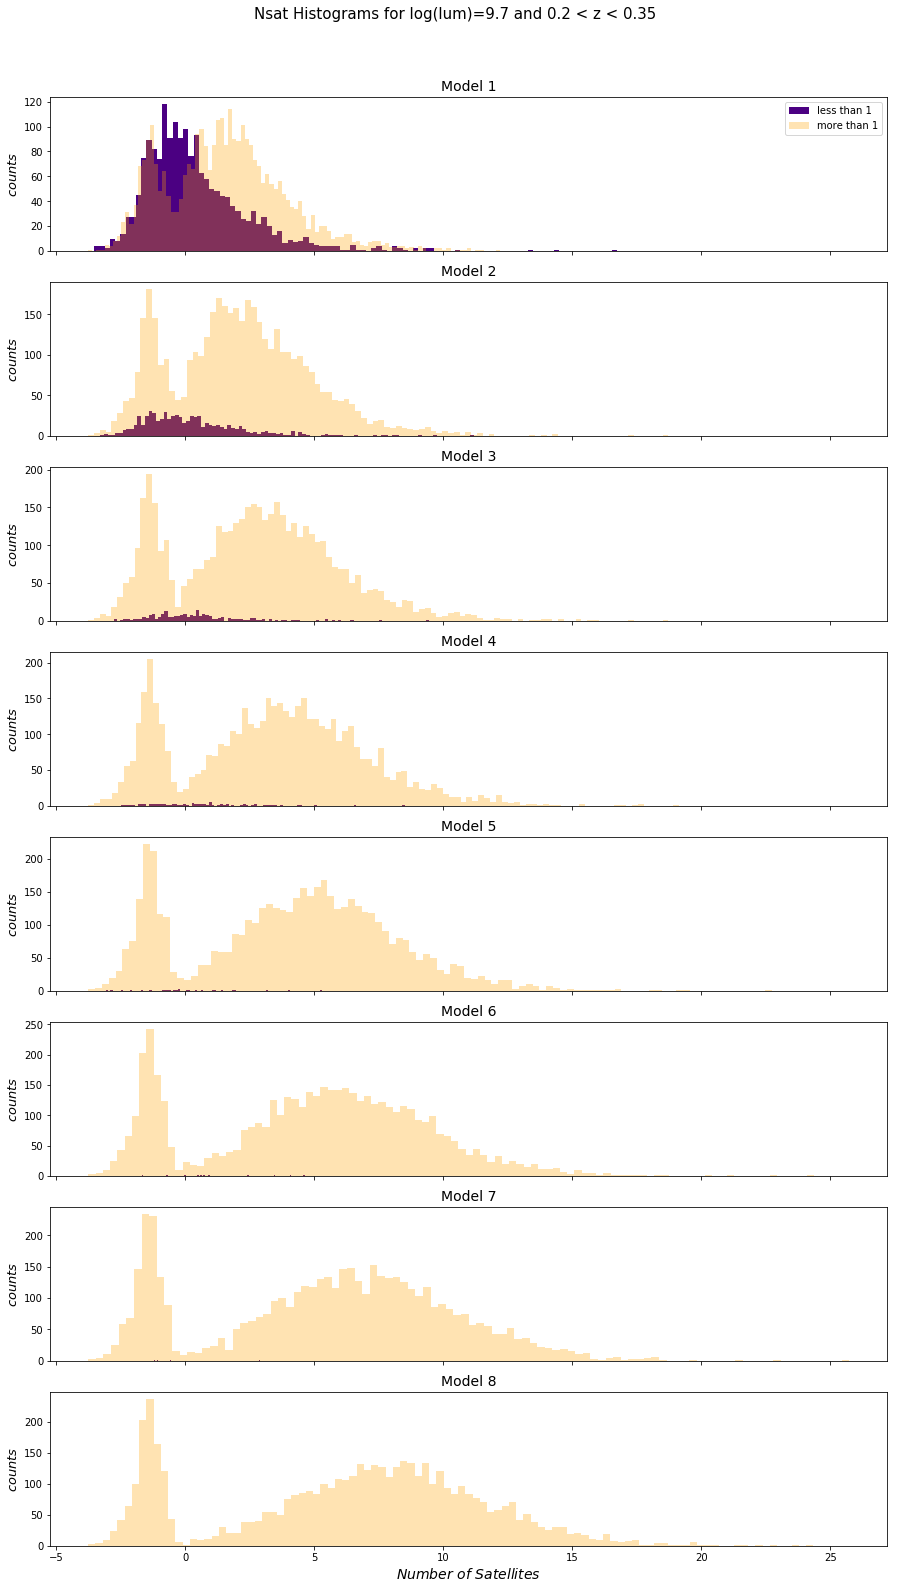

In [79]:
fig, (ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(8, 1, figsize=(15,25), sharex=True)
fig.suptitle('Nsat Histograms for log(lum)=9.7 and 0.2 < z < 0.35', fontsize=15)
fig.subplots_adjust(top=0.93)
# ax1.hist(low_sum35, bins=100)
# ax1.set_title('Data', fontsize=14)
# # ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
# ax1.set_ylabel(r'$counts$', fontsize=13)
# ax1.axvline(x=low_mean35, color='r')
# ax1.axvline(x=low_median35, color='black')
# ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean35), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
# ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median35), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

# ax2.hist(null_sum35, bins=100)
# ax2.set_title('Null', fontsize=14)
# # ax2.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
# ax2.set_ylabel(r'$counts$', fontsize=13)
# ax2.axvline(x=null_mean35, color='r')
# ax2.axvline(x=null_median35, color='black')
# ax2.text(0.6, 0.7, 'mean = {0:.4g}'.format(null_mean35), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13, color='r')
# ax2.text(0.6, 0.6, 'median = {0:.4g}'.format(null_median35), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13)
# ax2.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13)

ax3.hist(np.asarray(low_sum35_mod1)[indices_lt1_1], bins=100, color='indigo', label="less than 1")
ax3.hist(np.asarray(low_sum35_mod1)[indices_gt1_1], bins=100, alpha=0.3, color='orange', label='more than 1')
ax3.set_title('Model 1', fontsize=14)
# ax3.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax3.set_ylabel(r'$counts$', fontsize=13)
ax3.legend()
# ax3.axvline(x=low_mean35_mod1, color='r')
# ax3.axvline(x=low_median35_mod1, color='black')
# ax3.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean35_mod1), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13, color='r')
# ax3.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median35_mod1), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13)
# ax3.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35_1), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13)

ax4.hist(np.asarray(low_sum35_mod2)[indices_lt1_2], bins=100, color='indigo')
ax4.hist(np.asarray(low_sum35_mod2)[indices_gt1_2], bins=100, alpha=0.3, color='orange')
ax4.set_title('Model 2', fontsize=14)
# ax4.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax4.set_ylabel(r'$counts$', fontsize=13)
# ax4.axvline(x=low_mean35_mod2, color='r')
# ax4.axvline(x=low_median35_mod2, color='black')
# ax4.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean35_mod2), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13, color='r')
# ax4.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median35_mod2), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13)
# ax4.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35_2), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13)


ax5.hist(np.asarray(low_sum35_mod3)[indices_lt1_3], bins=100, color='indigo')
ax5.hist(np.asarray(low_sum35_mod3)[indices_gt1_3], bins=100, alpha=0.3, color='orange')
ax5.set_title('Model 3', fontsize=14)
# ax5.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax5.set_ylabel(r'$counts$', fontsize=13)
# ax5.axvline(x=low_mean35_mod3, color='r')
# ax5.axvline(x=low_median35_mod3, color='black')
# ax5.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean35_mod3), horizontalalignment='left', verticalalignment='center', transform=ax5.transAxes, fontsize=13, color='r')
# ax5.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median35_mod3), horizontalalignment='left', verticalalignment='center', transform=ax5.transAxes, fontsize=13)
# ax5.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35_3), horizontalalignment='left', verticalalignment='center', transform=ax5.transAxes, fontsize=13)

ax6.hist(np.asarray(low_sum35_mod4)[indices_lt1_4], bins=100, color='indigo')
ax6.hist(np.asarray(low_sum35_mod4)[indices_gt1_4], bins=100, alpha=0.3, color='orange')
ax6.set_title('Model 4', fontsize=14)
# ax6.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax6.set_ylabel(r'$counts$', fontsize=13)
# ax6.axvline(x=low_mean35_mod4, color='r')
# ax6.axvline(x=low_median35_mod4, color='black')
# ax6.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean35_mod4), horizontalalignment='left', verticalalignment='center', transform=ax6.transAxes, fontsize=13, color='r')
# ax6.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median35_mod4), horizontalalignment='left', verticalalignment='center', transform=ax6.transAxes, fontsize=13)
# ax6.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35_4), horizontalalignment='left', verticalalignment='center', transform=ax6.transAxes, fontsize=13)

ax7.hist(np.asarray(low_sum35_mod5)[indices_lt1_5], bins=100, color='indigo')
ax7.hist(np.asarray(low_sum35_mod5)[indices_gt1_5], bins=100, alpha=0.3, color='orange')
ax7.set_title('Model 5', fontsize=14)
# ax7.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax7.set_ylabel(r'$counts$', fontsize=13)
# ax7.axvline(x=low_mean35_mod5, color='r')
# ax7.axvline(x=low_median35_mod5, color='black')
# ax7.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean35_mod5), horizontalalignment='left', verticalalignment='center', transform=ax7.transAxes, fontsize=13, color='r')
# ax7.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median35_mod5), horizontalalignment='left', verticalalignment='center', transform=ax7.transAxes, fontsize=13)
# ax7.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35_5), horizontalalignment='left', verticalalignment='center', transform=ax7.transAxes, fontsize=13)

ax8.hist(np.asarray(low_sum35_mod6)[indices_lt1_6], bins=100, color='indigo')
ax8.hist(np.asarray(low_sum35_mod6)[indices_gt1_6], bins=100, alpha=0.3, color='orange')
ax8.set_title('Model 6', fontsize=14)
# ax8.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax8.set_ylabel(r'$counts$', fontsize=13)
# ax8.axvline(x=low_mean35_mod6, color='r')
# ax8.axvline(x=low_median35_mod6, color='black')
# ax8.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean35_mod6), horizontalalignment='left', verticalalignment='center', transform=ax8.transAxes, fontsize=13, color='r')
# ax8.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median35_mod6), horizontalalignment='left', verticalalignment='center', transform=ax8.transAxes, fontsize=13)
# ax8.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35_6), horizontalalignment='left', verticalalignment='center', transform=ax8.transAxes, fontsize=13)

ax9.hist(np.asarray(low_sum35_mod7)[indices_lt1_7], bins=100, color='indigo')
ax9.hist(np.asarray(low_sum35_mod7)[indices_gt1_7], bins=100, alpha=0.3, color='orange')
ax9.set_title('Model 7', fontsize=14)
# ax9.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax9.set_ylabel(r'$counts$', fontsize=13)
# ax9.axvline(x=low_mean35_mod7, color='r')
# ax9.axvline(x=low_median35_mod7, color='black')
# ax9.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean35_mod7), horizontalalignment='left', verticalalignment='center', transform=ax9.transAxes, fontsize=13, color='r')
# ax9.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median35_mod7), horizontalalignment='left', verticalalignment='center', transform=ax9.transAxes, fontsize=13)
# ax9.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35_7), horizontalalignment='left', verticalalignment='center', transform=ax9.transAxes, fontsize=13)

ax10.hist(np.asarray(low_sum35_mod8)[indices_lt1_8], bins=100, color='indigo')
ax10.hist(np.asarray(low_sum35_mod8)[indices_gt1_8], bins=100, alpha=0.3, color='orange')
ax10.set_title('Model 8', fontsize=14)
ax10.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax10.set_ylabel(r'$counts$', fontsize=13)
# ax10.axvline(x=low_mean35_mod8, color='r')
# ax10.axvline(x=low_median35_mod8, color='black')
# ax10.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean35_mod8), horizontalalignment='left', verticalalignment='center', transform=ax10.transAxes, fontsize=13, color='r')
# ax10.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median35_mod8), horizontalalignment='left', verticalalignment='center', transform=ax10.transAxes, fontsize=13)
# ax10.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35_8), horizontalalignment='left', verticalalignment='center', transform=ax10.transAxes, fontsize=13)
# 
plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/11Dec2020/lt1-vs-gt1-comparison.pdf')

plt.show()